# Analysis of Police Use of Force Incidents in Ontario - 2023
## Data-Driven Insights for Strategic Decision-Making# 
Presented by: Sanjir Inam Salsabi


In [88]:
import requests
import pandas as pd

# Define the URL
url = 'https://data.ontario.ca/api/3/action/datastore_search?resource_id=94f303a2-963e-4fd1-958d-6681b310cb6d&limit=5'

# Make the API request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data_json = response.json()
    
    # Extract the records from the JSON data
    records = data_json['result']['records']
    
    # Load the records into a Pandas DataFrame
    df = pd.DataFrame(records)
    
    # Display the DataFrame
    print(df)
else:
    print(f"Failed to fetch data. HTTP Status Code: {response.status_code}")

Failed to fetch data. HTTP Status Code: 403


In [105]:
# Loading the datasets locally as I could not able to fetch
import pandas as pd

main_record = pd.read_csv('/Users/macx/Downloads/JOB Assignment/Main_record2023.csv',dtype={'column_name': str}, low_memory=False)
individual_record = pd.read_csv('/Users/macx/Downloads/JOB Assignment/uof_individual_records2023.csv', dtype={'column_name': str}, low_memory=False)

# Chapter 1
### Initial Data Exploration
**Main Record Dataset:** Contains primary records related to police use of force incidents, including various numerical and categorical variables

**Individual Record Dataset:** Provides individual-level details for each incident, adding granularity to the data

In [90]:
#Exploring the datasets 
main_record_df_shape = main_record_df.shape
individual_record_df_shape = individual_record_df.shape

main_record_df_shape, individual_record_df_shape

((10935, 65), (12805, 112))

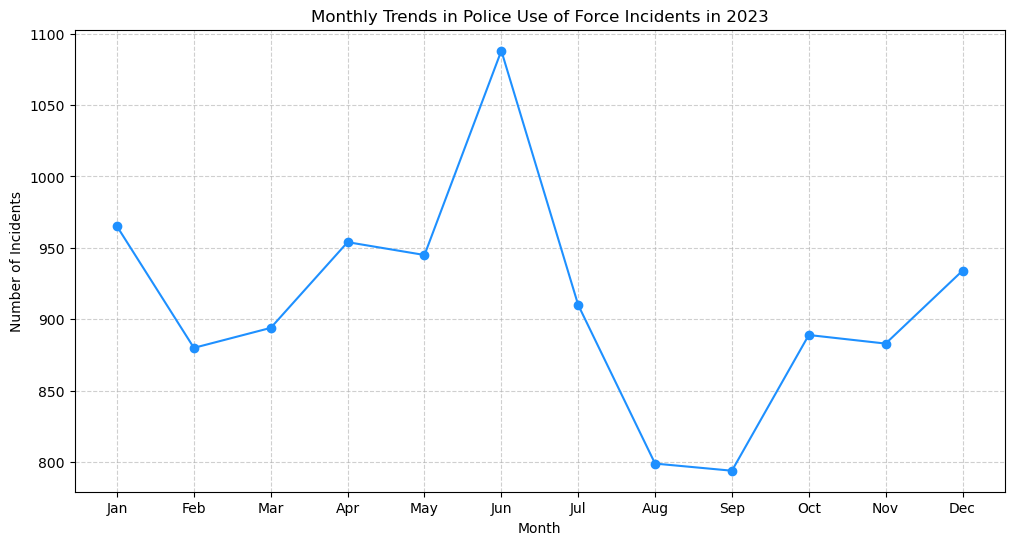

In [94]:
import matplotlib.pyplot as plt

# Convert date columns to datetime format for easier manipulation
main_record_df['date'] = pd.to_datetime(main_record_df['date'])

# Grouping the data by month to see the number of incidents per month
monthly_trends = main_record_df.groupby('Month').size()

# Plotting monthly trends in incidents
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o', linestyle='-', color='dodgerblue')
plt.title('Monthly Trends in Police Use of Force Incidents in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

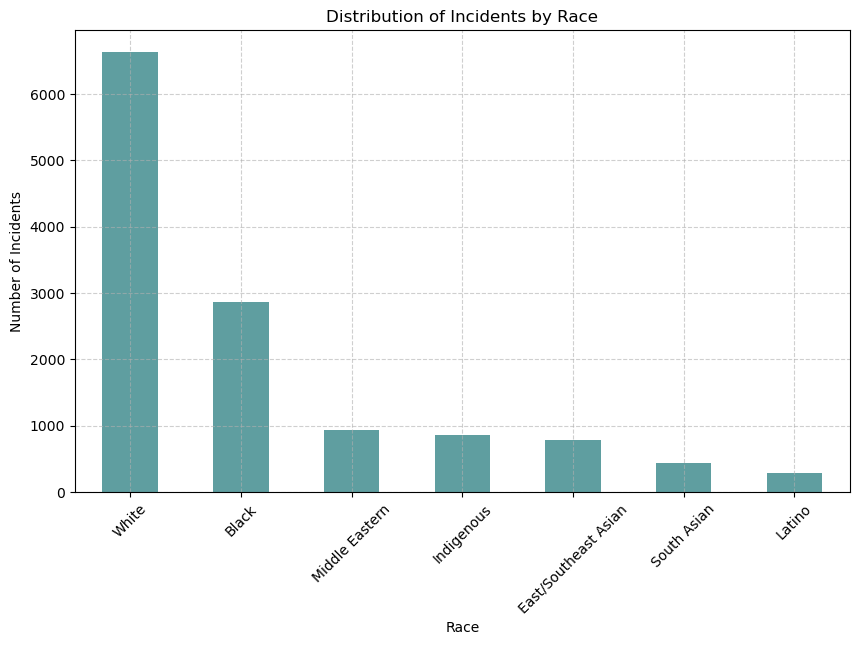

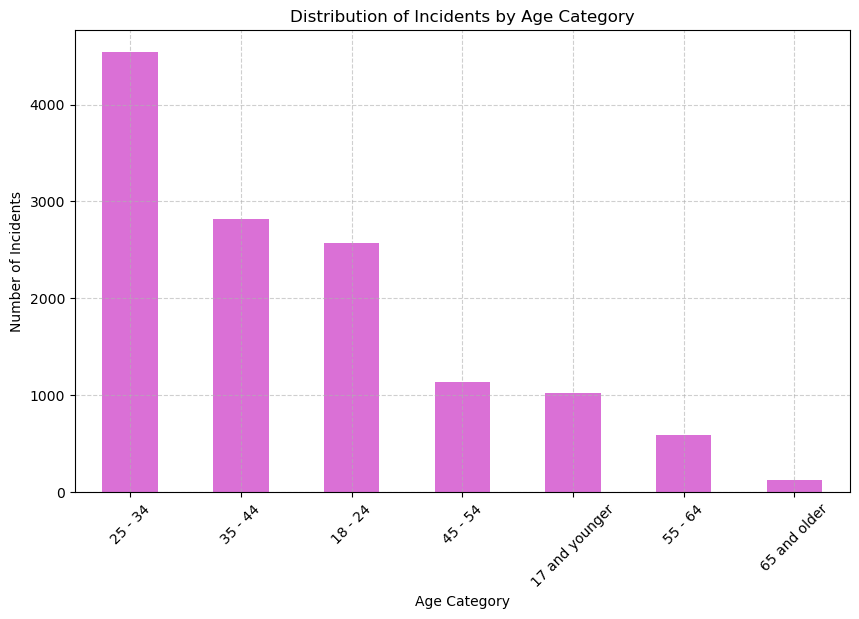

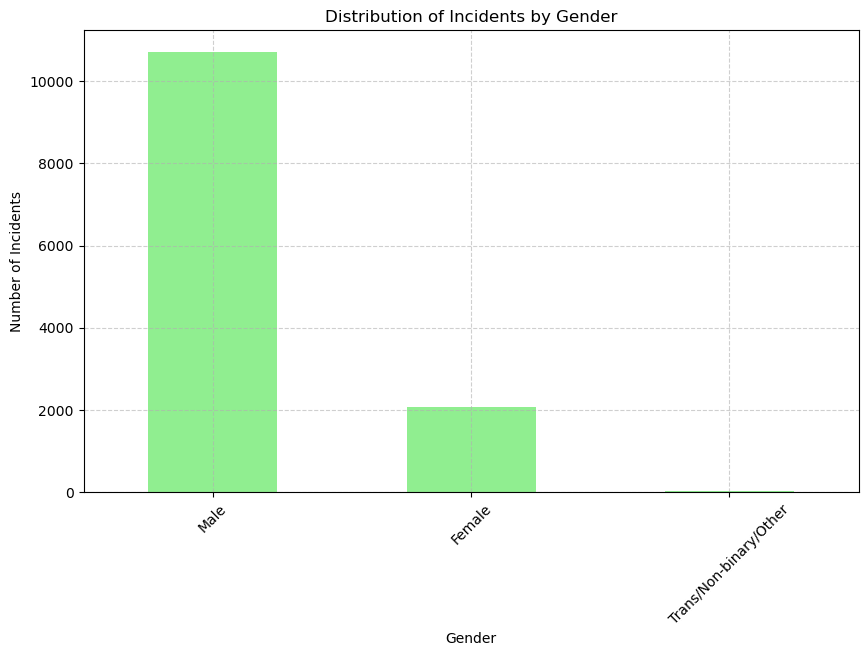

In [96]:
# Checking columns in the individual records dataset that might contain demographic information
demographic_columns = [col for col in individual_record_df.columns if 'age' in col or 'gender' in col or 'race' in col]

# Counting the frequency of each race category
race_counts = individual_record_df['race'].value_counts()

# Plotting the frequency of race categories
plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', color='cadetblue')
plt.title('Distribution of Incidents by Race')
plt.xlabel('Race')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Counting the frequency of each age category
age_counts = individual_record_df['agecategory'].value_counts()

# Plotting the frequency of age categories
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='orchid')
plt.title('Distribution of Incidents by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Counting the frequency of each gender
gender_counts = individual_record_df['gender'].value_counts()

# Plotting the frequency of gender
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Incidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/var/folders/vg/7mcj8w317dsdqkcdbdpmslzw0000gn/T/ipykernel_16130/407974465.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_incident_types = main_record_df.groupby(['Month', 'incidenttype']).size().unstack(fill_value=0)


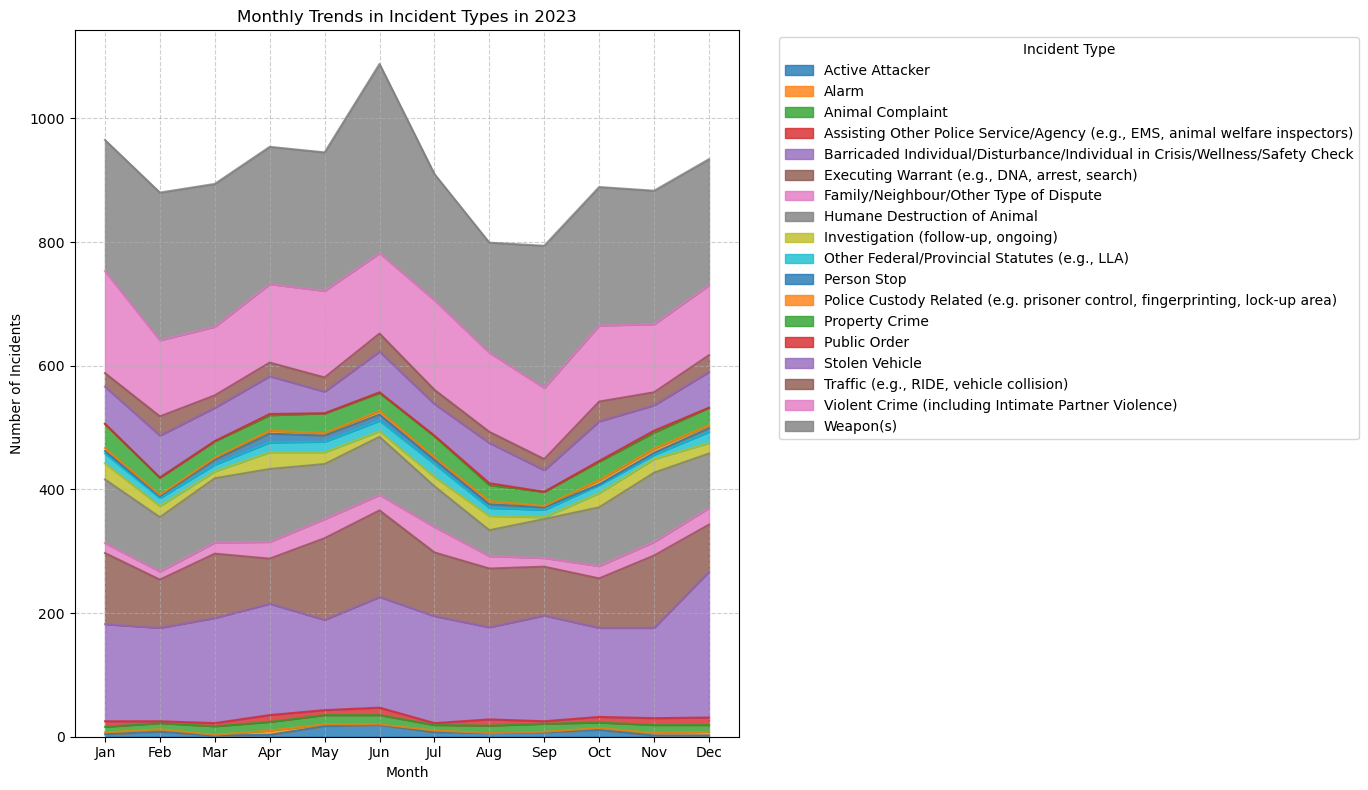

In [97]:
#Trend Analysis

# Extracting and aggregating incident types by month from the main record dataset
main_record_df['incidenttype'] = main_record_df['incidenttype'].astype('category')
monthly_incident_types = main_record_df.groupby(['Month', 'incidenttype']).size().unstack(fill_value=0)

# Plotting monthly trends in incident types
fig, ax = plt.subplots(figsize=(14, 8))
monthly_incident_types.plot(kind='area', ax=ax, stacked=True, alpha=0.8)
plt.title('Monthly Trends in Incident Types in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

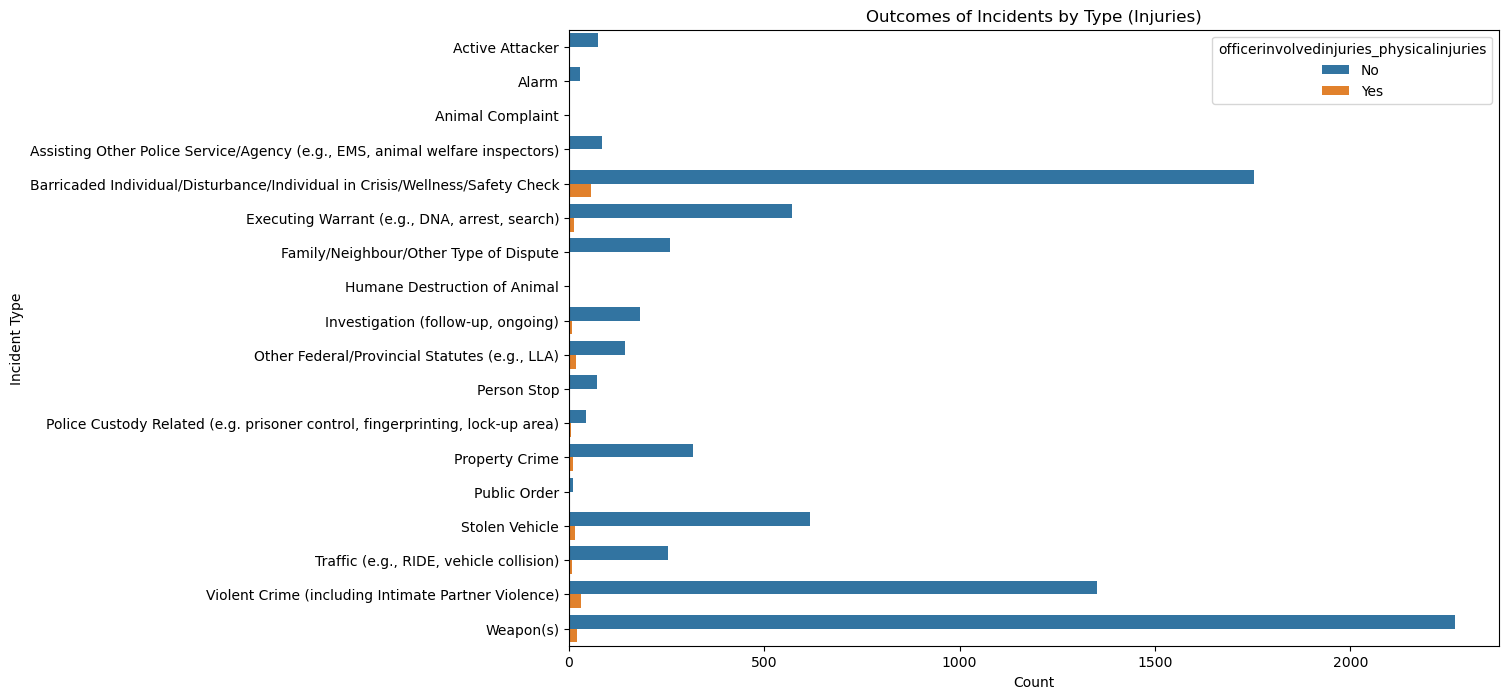

In [103]:
# Analyze the outcomes of incidents focusing on physical injuries
plt.figure(figsize=(12, 8))
sns.countplot(y='incidenttype', hue='officerinvolvedinjuries_physicalinjuries', data=main_record_df)
plt.title('Outcomes of Incidents by Type (Injuries)')
plt.xlabel('Count')
plt.ylabel('Incident Type')
plt.show()

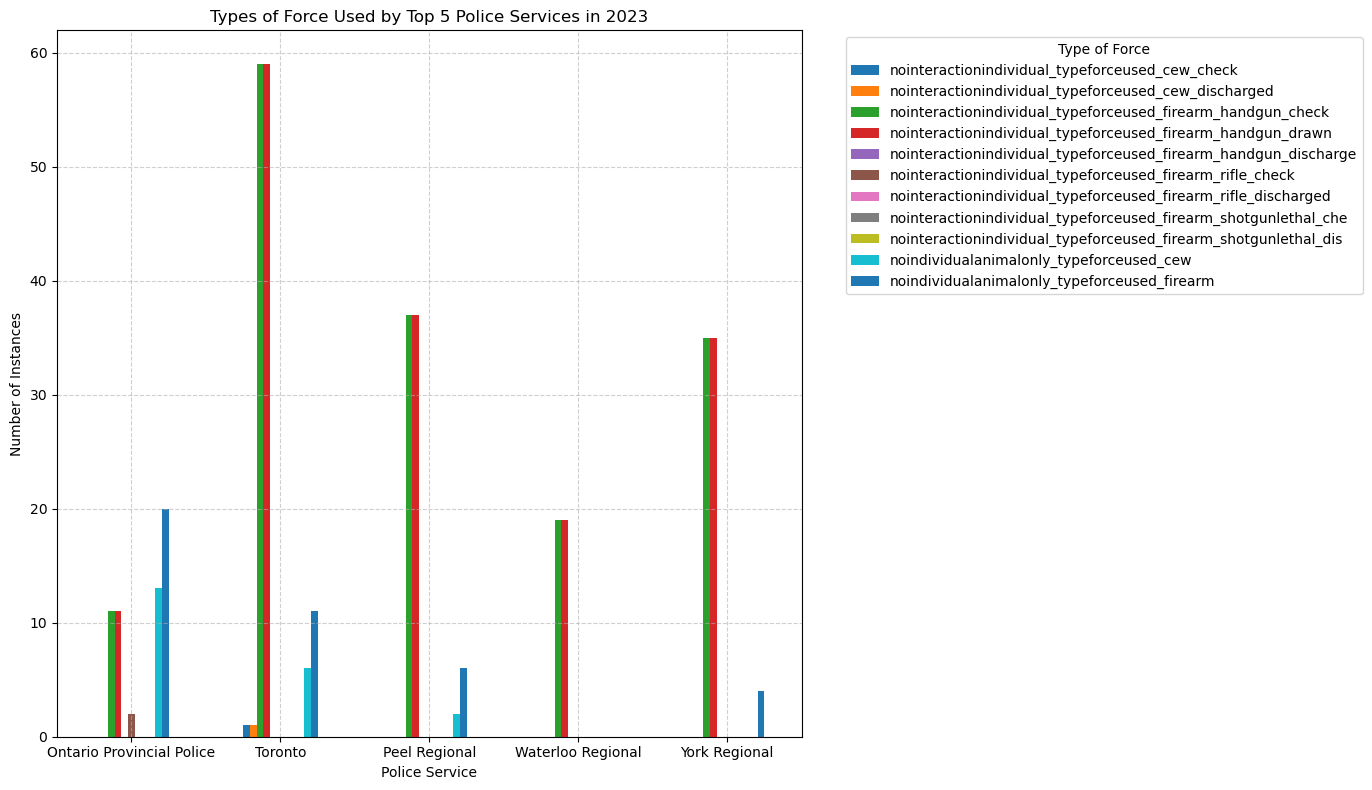

In [102]:
# Regional Distribution of Incidents
# Counting the frequency of incidents by police service
police_service_counts = main_record_df['policeservice'].value_counts()

# Displaying columns from the main_record_df that are related to types of force to correct the earlier issue
force_type_columns_main = [col for col in main_record_df.columns if 'typeforceused' in col]

# Aggregating the correct types of force used by police service
corrected_force_types_by_service = main_record_df.groupby('policeservice')[force_type_columns_main].sum()

# Top 5 police services based on the number of incidents
top_services = police_service_counts.head(5).index

# Plotting the types of force used by the top 5 police services
force_types_top_services_corrected = corrected_force_types_by_service.loc[top_services]

# Reusing the aggregation and plotting the corrected types of force for the top services
force_types_top_services_corrected = corrected_force_types_by_service.loc[top_services]

fig, ax = plt.subplots(figsize=(14, 8))
force_types_top_services_corrected.plot(kind='bar', ax=ax)
plt.title('Types of Force Used by Top 5 Police Services in 2023')
plt.xlabel('Police Service')
plt.ylabel('Number of Instances')
plt.legend(title='Type of Force', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Chapter 2

### Data Integration

The two datasets were merged using the **BatchFileName** as a common key. This integration allowed for a *more comprehensive view* of the data by combining incident-level and individual-level information

In [6]:
# Combine both datasets using 'BatchFileName' as the key
combined_data = pd.merge(main_record, individual_record, on='BatchFileName')

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
numerical_cols = combined_data.select_dtypes(include=['number']).columns
categorical_cols = combined_data.select_dtypes(include=['object']).columns
mixed_type_cols = [col for col in combined_data.columns if combined_data[col].apply(type).nunique() > 1]

# Inspect the initial column counts and types
initial_column_counts = combined_data.shape[1]
numerical_column_counts = len(numerical_cols)
categorical_column_counts = len(categorical_cols)
mixed_type_column_counts = len(mixed_type_cols)

# Revalidate and report after each processing step
initial_column_counts, numerical_column_counts, categorical_column_counts, mixed_type_column_counts


(176, 137, 39, 19)

### Initial Observations
The discrepancy likely arises from the mixed-type columns (19). I'll address these **mixed types** first by converting them entirely to strings (for consistency), and then proceed with the **imputation and encoding** process step by step 

In [10]:
# Convert mixed-type columns to string for consistent handling
for col in mixed_type_cols:
    combined_data[col] = combined_data[col].astype(str)

# Re-separate numerical and categorical columns after conversion
numerical_cols = combined_data.select_dtypes(include=['number']).columns
categorical_cols = combined_data.select_dtypes(include=['object', 'category']).columns

# Re-check the column counts after handling mixed types
updated_numerical_column_counts = len(numerical_cols)
updated_categorical_column_counts = len(categorical_cols)

updated_numerical_column_counts, updated_categorical_column_counts


(137, 39)

### After converting the mixed-type columns to strings, the dataset still has 137 numerical columns and 39 categorical columns, which is consistent with the initial separation. This indicates that the mixed-type handling was successful.

Next, I'll proceed with imputing missing values for **both** numerical and categorical columns and then encode the categorical columns.

In [12]:
# Inspect the numerical columns to identify any potential issues
numerical_columns_info = combined_data[numerical_cols].info()
numerical_columns_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Columns: 137 entries, _id to IndividualInjuries_Treatment_Other
dtypes: float64(134), int64(3)
memory usage: 13.4 MB


The numerical data consists of 137 columns, with a mix of float64 (134 columns) and int64 (3 columns) data types. The structure seems normal

**Isolating a few numerical columns and running the imputation on this subset will help identify if the issue is specific to certain columns or if it's a broader problem?**

In [ ]:
# Impute numerical and categorical columns separately
numeric_imputer = SimpleImputer(strategy='mean')
numerical_imputed = pd.DataFrame(numeric_imputer.fit_transform(combined_data[numerical_cols]), columns=numerical_cols)

categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputed = pd.DataFrame(categorical_imputer.fit_transform(combined_data[categorical_cols]), columns=categorical_cols)

# Combine the imputed numerical and categorical columns
combined_data_processed = pd.concat([numerical_imputed, categorical_imputed], axis=1)

# Encode categorical columns after imputation
for col in categorical_cols:
    le = LabelEncoder()
    combined_data_processed[col] = le.fit_transform(combined_data_processed[col].astype(str))

# Check the shape of the processed data to ensure consistency
processed_data_shape = combined_data_processed.shape
processed_data_shape


# Chapter 3

### Data Cleaning and Preprocessing

In [15]:
# Isolate a small subset of numerical columns to test the imputation process
subset_numerical_cols = numerical_cols[:5]  # Selecting the first 5 numerical columns as a test

# Attempt imputation on this subset
subset_numerical_imputed = pd.DataFrame(numeric_imputer.fit_transform(combined_data[subset_numerical_cols]), columns=subset_numerical_cols)

# Check the shape and content of the imputed subset to ensure it matches the expected structure
subset_numerical_imputed_shape = subset_numerical_imputed.shape
subset_numerical_imputed_head = subset_numerical_imputed.head()

subset_numerical_imputed_shape, subset_numerical_imputed_head


((12805, 5),
    _id  BatchFileName  LocationType_ResidentialBuilding  \
 0  1.0    418729783.0                               1.0   
 1  1.0    418729783.0                               1.0   
 2  2.0    243682269.0                               1.0   
 3  3.0    527449862.0                               1.0   
 4  4.0    159503911.0                               1.0   
 
    LocationType_NonResidentialBuilding  LocationType_MotorVehicle  
 0                                  1.0                        1.0  
 1                                  1.0                        1.0  
 2                                  1.0                        1.0  
 3                                  1.0                        1.0  
 4                                  1.0                        1.0  )

In [ ]:
# Gradually increasing the number of numerical columns to test the imputation process
subset_numerical_cols = numerical_cols[:20]  # Selecting the first 20 numerical columns as a test

# Attempt imputation on this expanded subset
expanded_subset_numerical_imputed = pd.DataFrame(numeric_imputer.fit_transform(combined_data[subset_numerical_cols]), columns=subset_numerical_cols)

# Check the shape and content of the imputed subset to ensure it matches the expected structure
expanded_subset_numerical_imputed_shape = expanded_subset_numerical_imputed.shape
expanded_subset_numerical_imputed_head = expanded_subset_numerical_imputed.head()

expanded_subset_numerical_imputed_shape, expanded_subset_numerical_imputed_head


In [18]:
# Test imputation on individual columns within the problematic range
subset_numerical_cols_cluster_1 = numerical_cols[21:27]
# Test each column one by one to identify the problematic column
problematic_columns = []
for col in subset_numerical_cols_cluster_1:
    try:
        # Attempt imputation on a single column
        single_col_imputed = numeric_imputer.fit_transform(combined_data[[col]])
        problematic_columns.append((col, "No issue"))
    except ValueError as e:
        problematic_columns.append((col, str(e)))

problematic_columns

/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['NoInteractionIndividual_ReasonUseOfForce_EffectArrest']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['NoInteractionIndividual_ReasonUseOfForce_PreventOffence']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['NoInteractionIndividual_ReasonUseOfForce_PreventEscape']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:

[('NoInteractionIndividual_ReasonUseOfForce_EffectArrest', 'No issue'),
 ('NoInteractionIndividual_ReasonUseOfForce_PreventOffence', 'No issue'),
 ('NoInteractionIndividual_ReasonUseOfForce_PreventEscape', 'No issue'),
 ('NoInteractionIndividual_ReasonUseOfForce_ProtectOtherOfficers', 'No issue'),
 ('NoInteractionIndividual_ReasonUseOfForce_ProtectPublic', 'No issue'),
 ('NoInteractionIndividual_ReasonUseOfForce_ProtectSelf', 'No issue')]

#### Interestingly, none of the columns in this cluster individually caused an issue when imputed separately. This suggests that the problem might occur only when these columns are imputed together, due to some interaction or specific characteristics when combined

Testing **different combinations** of columns to identify if the issue occurs with specific groupings

In [19]:
# First combination: first three columns
subset_combination_1 = ['HumaneDestructionAnimal_Rifle', 'HumaneDestructionAnimal_Shotgun', 'HumaneDestructionAnimal_NumberRoundsDischarged']

try:
    combination_1_imputed = pd.DataFrame(numeric_imputer.fit_transform(combined_data[subset_combination_1]), columns=subset_combination_1)
    combination_1_status = "No issue"
except ValueError as e:
    combination_1_status = str(e)

# Second combination: last three columns
subset_combination_2 = ['InteractionType', 'NumberIndividuals', 'NumberOtherOfficers']

try:
    combination_2_imputed = pd.DataFrame(numeric_imputer.fit_transform(combined_data[subset_combination_2]), columns=subset_combination_2)
    combination_2_status = "No issue"
except ValueError as e:
    combination_2_status = str(e)

combination_1_status, combination_2_status


/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['HumaneDestructionAnimal_Rifle' 'HumaneDestructionAnimal_Shotgun'
 'HumaneDestructionAnimal_NumberRoundsDischarged']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


('Shape of passed values is (12805, 0), indices imply (12805, 3)',
 "Cannot use mean strategy with non-numeric data:\ncould not convert string to float: 'Interaction with Individual(s)'")

In [20]:
# Test pairs from the problematic first combination

# First pair
subset_pair_1 = ['HumaneDestructionAnimal_Rifle', 'HumaneDestructionAnimal_Shotgun']

try:
    pair_1_imputed = pd.DataFrame(numeric_imputer.fit_transform(combined_data[subset_pair_1]), columns=subset_pair_1)
    pair_1_status = "No issue"
except ValueError as e:
    pair_1_status = str(e)

# Second pair
subset_pair_2 = ['HumaneDestructionAnimal_Rifle', 'HumaneDestructionAnimal_NumberRoundsDischarged']

try:
    pair_2_imputed = pd.DataFrame(numeric_imputer.fit_transform(combined_data[subset_pair_2]), columns=subset_pair_2)
    pair_2_status = "No issue"
except ValueError as e:
    pair_2_status = str(e)

# Third pair
subset_pair_3 = ['HumaneDestructionAnimal_Shotgun', 'HumaneDestructionAnimal_NumberRoundsDischarged']

try:
    pair_3_imputed = pd.DataFrame(numeric_imputer.fit_transform(combined_data[subset_pair_3]), columns=subset_pair_3)
    pair_3_status = "No issue"
except ValueError as e:
    pair_3_status = str(e)

pair_1_status, pair_2_status, pair_3_status


/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['HumaneDestructionAnimal_Rifle' 'HumaneDestructionAnimal_Shotgun']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['HumaneDestructionAnimal_Rifle'
 'HumaneDestructionAnimal_NumberRoundsDischarged']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['HumaneDestructionAnimal_Shotgun'
 'HumaneDestructionAnimal_NumberRoundsDischarged']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


('Shape of passed values is (12805, 0), indices imply (12805, 2)',
 'Shape of passed values is (12805, 0), indices imply (12805, 2)',
 'Shape of passed values is (12805, 0), indices imply (12805, 2)')

In [21]:
# Identify columns with zero non-null values
zero_non_null_columns = combined_data.columns[combined_data.isna().all()]

# Applying user-provided code to convert column names to lowercase
combined_data.columns = combined_data.columns.str.lower()
combined_data_lowercased_head = combined_data.head()

# Report the columns with zero non-null values and show the first few rows of the dataset
zero_non_null_columns, combined_data_lowercased_head


(Index(['HumaneDestructionAnimal_Distance', 'HumaneDestructionAnimal_Handgun',
        'HumaneDestructionAnimal_Rifle', 'HumaneDestructionAnimal_Shotgun',
        'HumaneDestructionAnimal_NumberRoundsDischarged',
        'NoInteractionIndividual_ReasonUseOfForce_EffectArrest',
        'NoInteractionIndividual_ReasonUseOfForce_PreventOffence',
        'NoInteractionIndividual_ReasonUseOfForce_PreventEscape',
        'NoInteractionIndividual_ReasonUseOfForce_ProtectOtherOfficers',
        'NoInteractionIndividual_ReasonUseOfForce_ProtectPublic',
        'NoInteractionIndividual_ReasonUseOfForce_ProtectSelf',
        'NoInteractionIndividual_ReasonUseOfForce_ProtectIndividual',
        'NoInteractionIndividual_ReasonUseOfForce_Unintentional',
        'NoInteractionIndividual_ReasonUseOfForce_Other',
        'NoInteractionIndividual_TypeForceUsed_CEW_Check',
        'NoInteractionIndividual_TypeForceUsed_CEW_Discharged',
        'NoInteractionIndividual_TypeForceUsed_Firearm_Handgun_Check'

## Inspect columns for any anomalies, such as entirely missing data or unexpected values

In [ ]:
# Drop columns with zero non-null values
combined_data_cleaned = combined_data.drop(columns=zero_non_null_columns)

# Recheck the remaining columns and proceed with imputation
numerical_cols_cleaned = combined_data_cleaned.select_dtypes(include=['number']).columns
categorical_cols_cleaned = combined_data_cleaned.select_dtypes(include=['object', 'category']).columns

# Impute numerical columns in the cleaned dataset
numerical_imputed_cleaned = pd.DataFrame(numeric_imputer.fit_transform(combined_data_cleaned[numerical_cols_cleaned]), columns=numerical_cols_cleaned)

# Impute categorical columns
categorical_imputed_cleaned = pd.DataFrame(categorical_imputer.fit_transform(combined_data_cleaned[categorical_cols_cleaned]), columns=categorical_cols_cleaned)

# Combine the imputed numerical and categorical columns
combined_data_processed_cleaned = pd.concat([numerical_imputed_cleaned, categorical_imputed_cleaned], axis=1)

# Encode categorical columns after imputation
for col in categorical_cols_cleaned:
    le = LabelEncoder()
    combined_data_processed_cleaned[col] = le.fit_transform(combined_data_processed_cleaned[col].astype(str))

# Check the shape of the processed data to ensure consistency
processed_data_cleaned_shape = combined_data_processed_cleaned.shape
processed_data_cleaned_shape


# Chapter 4

### Further Cleaning, Processing & Standardizing the data

In order to identify **key predictors of police use of force**, addressed **data quality** issues, and recommended enhancing data collection with focusing on influential factors for strategic decision-making

In [ ]:
# Filter the list of columns to remove, keeping only those present in the current dataset
columns_to_remove = [col for col in zero_non_null_columns if col in combined_data.columns]

# Drop the filtered list of columns with zero non-null values
combined_data_cleaned = combined_data.drop(columns=columns_to_remove)

# Recheck the remaining columns and proceed with imputation
numerical_cols_cleaned = combined_data_cleaned.select_dtypes(include=['number']).columns
categorical_cols_cleaned = combined_data_cleaned.select_dtypes(include=['object', 'category']).columns

# Impute numerical columns in the cleaned dataset
numerical_imputed_cleaned = pd.DataFrame(numeric_imputer.fit_transform(combined_data_cleaned[numerical_cols_cleaned]), columns=numerical_cols_cleaned)

# Impute categorical columns
categorical_imputed_cleaned = pd.DataFrame(categorical_imputer.fit_transform(combined_data_cleaned[categorical_cols_cleaned]), columns=categorical_cols_cleaned)

# Combine the imputed numerical and categorical columns
combined_data_processed_cleaned = pd.concat([numerical_imputed_cleaned, categorical_imputed_cleaned], axis=1)

# Encode categorical columns after imputation
for col in categorical_cols_cleaned:
    le = LabelEncoder()
    combined_data_processed_cleaned[col] = le.fit_transform(combined_data_processed_cleaned[col].astype(str))

# Check the shape of the processed data to ensure consistency
processed_data_cleaned_shape = combined_data_processed_cleaned.shape
processed_data_cleaned_shape

In [24]:
# Review the remaining columns in the cleaned dataset
remaining_columns_info = combined_data_cleaned.info()
remaining_columns_description = combined_data_cleaned.describe(include='all')

remaining_columns_info, remaining_columns_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Columns: 176 entries, _id to individualinjuries_treatment_other
dtypes: float64(134), int64(3), object(39)
memory usage: 17.2+ MB


(None,
                  _id  batchfilename policeservicetype policeservice  \
 count   12805.000000   1.280500e+04             12805         12805   
 unique           NaN            NaN                 2            44   
 top              NaN            NaN  Municipal Police       Toronto   
 freq             NaN            NaN             10344          3137   
 mean     4794.337681   5.536165e+08               NaN           NaN   
 std      2648.570212   2.565705e+08               NaN           NaN   
 min         1.000000   1.000855e+08               NaN           NaN   
 25%      2612.000000   3.382635e+08               NaN           NaN   
 50%      4835.000000   5.509550e+08               NaN           NaN   
 75%      7046.000000   7.806204e+08               NaN           NaN   
 max      9332.000000   9.999008e+08               NaN           NaN   
 
        opp_policeservice incidentnumber        date  \
 count              12805          12805       12805   
 unique        

In [25]:
# Set a threshold for non-null values (e.g., at least 100 non-null values) and remove columns below this threshold
non_null_threshold = 100
columns_to_keep = combined_data_cleaned.columns[combined_data_cleaned.notnull().sum() >= non_null_threshold]

# Remove columns that do not meet the non-null threshold
combined_data_cleaned = combined_data_cleaned[columns_to_keep]

# Remove columns with only one unique value
columns_with_variation = combined_data_cleaned.columns[combined_data_cleaned.nunique() > 1]
combined_data_cleaned = combined_data_cleaned[columns_with_variation]

# Check the resulting shape of the cleaned data
cleaned_data_shape = combined_data_cleaned.shape
cleaned_data_shape


(12805, 42)

In [26]:
combined_data.shape

(12805, 176)

#### Compared to the initial combined dataset, which included 176 columns with mixed data types, the **Cleaned data** reduce to 42 columns, ensuring consistency and relevance

In [30]:
from sklearn.impute import SimpleImputer

# Define the imputers
numeric_imputer = SimpleImputer(strategy='mean')  # For numerical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

# Impute numerical columns in the cleaned dataset
numerical_imputed_cleaned = pd.DataFrame(numeric_imputer.fit_transform(combined_data_cleaned[numerical_cols_cleaned]), columns=numerical_cols_cleaned)

# Impute categorical columns
categorical_imputed_cleaned = pd.DataFrame(categorical_imputer.fit_transform(combined_data_cleaned[categorical_cols_cleaned]), columns=categorical_cols_cleaned)

# Combine the imputed numerical and categorical columns
combined_data_processed_cleaned = pd.concat([numerical_imputed_cleaned, categorical_imputed_cleaned], axis=1)

# Encode categorical columns after imputation
for col in categorical_cols_cleaned:
    le = LabelEncoder()
    combined_data_processed_cleaned[col] = le.fit_transform(combined_data_processed_cleaned[col].astype(str))

# Check the shape of the processed data to ensure consistency
processed_data_cleaned_shape = combined_data_processed_cleaned.shape
print(processed_data_cleaned_shape)


(12805, 42)


In [31]:
# Recheck the remaining columns after cleaning
numerical_cols_cleaned = combined_data_cleaned.select_dtypes(include=['number']).columns
categorical_cols_cleaned = combined_data_cleaned.select_dtypes(include=['object', 'category']).columns

# Impute numerical columns in the cleaned dataset
numerical_imputed_cleaned = pd.DataFrame(numeric_imputer.fit_transform(combined_data_cleaned[numerical_cols_cleaned]), columns=numerical_cols_cleaned)

# Impute categorical columns
categorical_imputed_cleaned = pd.DataFrame(categorical_imputer.fit_transform(combined_data_cleaned[categorical_cols_cleaned]), columns=categorical_cols_cleaned)

# Combine the imputed numerical and categorical columns
combined_data_processed_cleaned = pd.concat([numerical_imputed_cleaned, categorical_imputed_cleaned], axis=1)

# Encode categorical columns after imputation
for col in categorical_cols_cleaned:
    le = LabelEncoder()
    combined_data_processed_cleaned[col] = le.fit_transform(combined_data_processed_cleaned[col].astype(str))

# Check the shape of the processed data to ensure consistency
processed_data_cleaned_shape = combined_data_processed_cleaned.shape
processed_data_cleaned_shape


(12805, 42)

#### The data processing steps on the cleaned dataset, maintains 42 columns. 

Encoding of categorical columns, Imputation of missing values for both numerical and categorical columns on this cleaned dataset ensures everything works smoothly

In [32]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

main_record_df.columns = main_record_df.columns.str.lower()
individual_record_df.columns = individual_record_df.columns.str.lower()

# Merging datasets on a common key, if available
# 'batchfilename' is the key for merging
combined_data = pd.merge(main_record_df, individual_record_df, on='batchfilename')

# Dropping columns with zero non-null values
zero_non_null_columns = combined_data.columns[combined_data.isna().all()]
combined_data_cleaned = combined_data.drop(columns=zero_non_null_columns)

# Further cleaning the dataset by removing columns with very few non-null values
non_null_threshold = 100
columns_to_keep = combined_data_cleaned.columns[combined_data_cleaned.notnull().sum() >= non_null_threshold]
combined_data_cleaned = combined_data_cleaned[columns_to_keep]

# Removing columns with only one unique value
columns_with_variation = combined_data_cleaned.columns[combined_data_cleaned.nunique() > 1]
combined_data_cleaned = combined_data_cleaned[columns_with_variation]

# Defining imputers
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Imputing numerical and categorical columns separately
numerical_cols_cleaned = combined_data_cleaned.select_dtypes(include=['number']).columns
categorical_cols_cleaned = combined_data_cleaned.select_dtypes(include=['object', 'category']).columns

numerical_imputed_cleaned = pd.DataFrame(numeric_imputer.fit_transform(combined_data_cleaned[numerical_cols_cleaned]), columns=numerical_cols_cleaned)
categorical_imputed_cleaned = pd.DataFrame(categorical_imputer.fit_transform(combined_data_cleaned[categorical_cols_cleaned]), columns=categorical_cols_cleaned)

# Combining the imputed numerical and categorical data
combined_data_processed_cleaned = pd.concat([numerical_imputed_cleaned, categorical_imputed_cleaned], axis=1)

# Encoding categorical columns
for col in categorical_cols_cleaned:
    le = LabelEncoder()
    combined_data_processed_cleaned[col] = le.fit_transform(combined_data_processed_cleaned[col].astype(str))


# Chapter 5

### Explanatory in-depth Analysis of Processed_Cleaned Data (EDA) 

/var/folders/vg/7mcj8w317dsdqkcdbdpmslzw0000gn/T/ipykernel_16130/3740037142.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data_processed_cleaned['hour'] = pd.to_datetime(combined_data_cleaned['approximatetimeforceapplied'], errors='coerce').dt.hour


Text(0, 0.5, 'Number of Incidents')

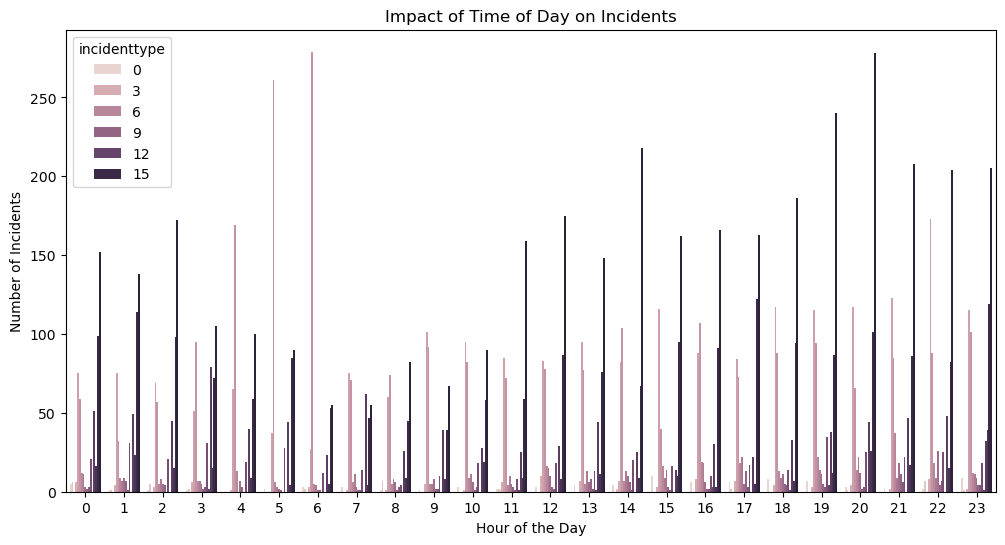

In [39]:
# Visualizations
# Impact of Time of Day on Incidents
combined_data_processed_cleaned['hour'] = pd.to_datetime(combined_data_cleaned['approximatetimeforceapplied'], errors='coerce').dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(data=combined_data_processed_cleaned, x='hour', hue='incidenttype')
plt.title('Impact of Time of Day on Incidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')


Text(0, 0.5, 'Age Category')

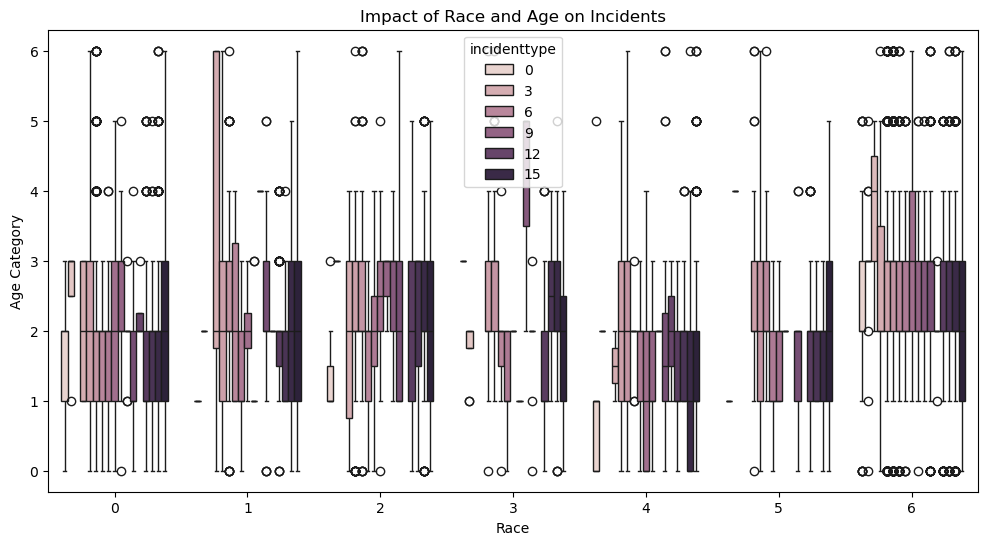

In [38]:
# Race and Age Impact
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data_processed_cleaned, x='race', y='agecategory', hue='incidenttype')
plt.title('Impact of Race and Age on Incidents')
plt.xlabel('Race')
plt.ylabel('Age Category')

#### Demographic Analysis of Incident Involvement by Race, Age and Gender

Text(0, 0.5, 'Count')

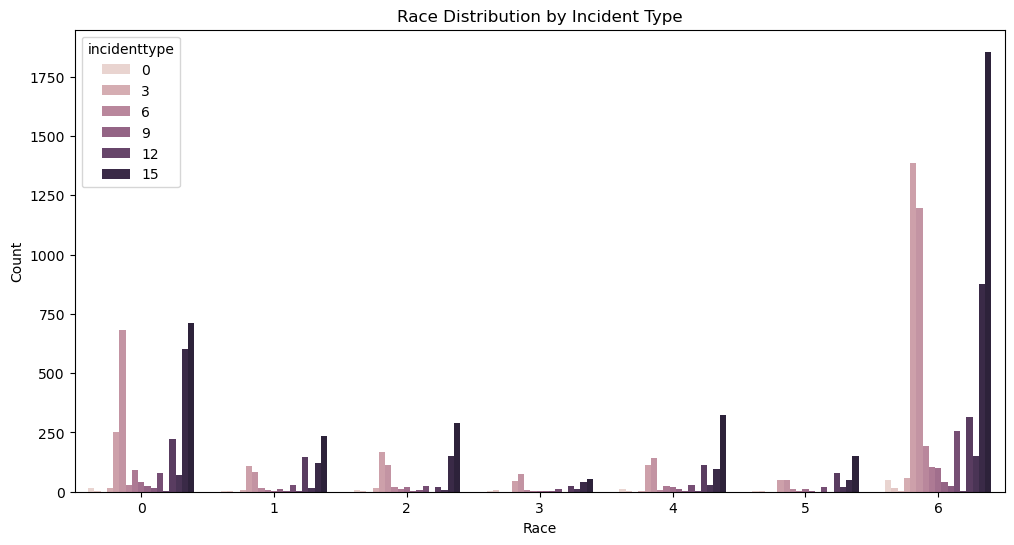

In [43]:
# Race and Gender Distribution by Incident Type
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_data_processed_cleaned, x='race', hue='incidenttype')
plt.title('Race Distribution by Incident Type')
plt.xlabel('Race')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

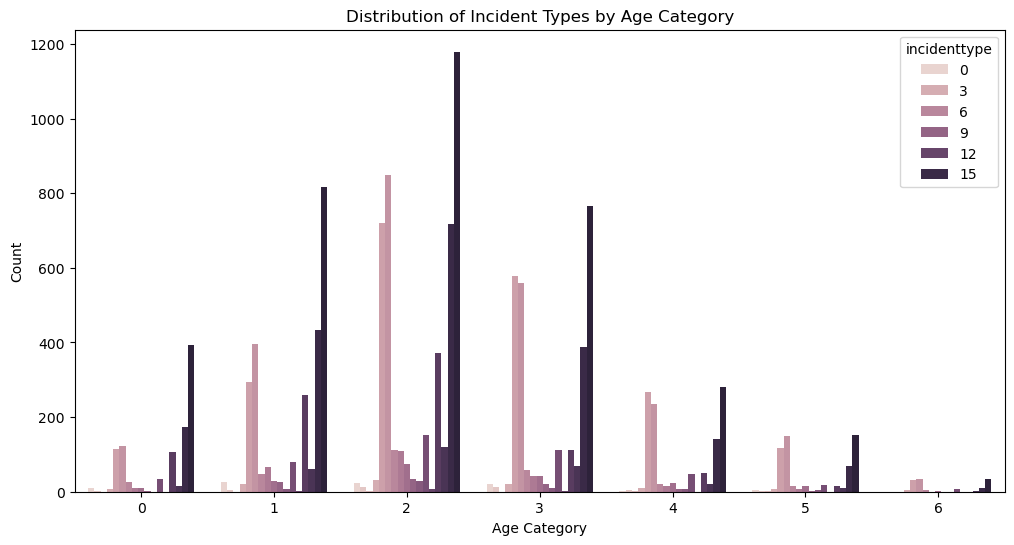

In [51]:
# Stacked Bar Plot: Distribution of Incident Types by Age Category
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_data_processed_cleaned, x='agecategory', hue='incidenttype')
plt.title('Distribution of Incident Types by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

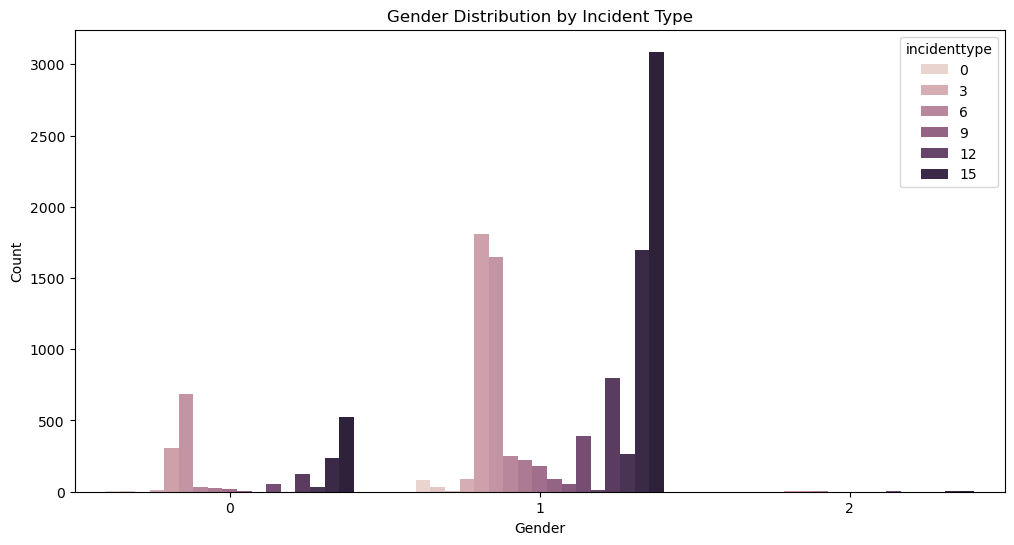

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_data_processed_cleaned, x='gender', hue='incidenttype')
plt.title('Gender Distribution by Incident Type')
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Probability of Incident')

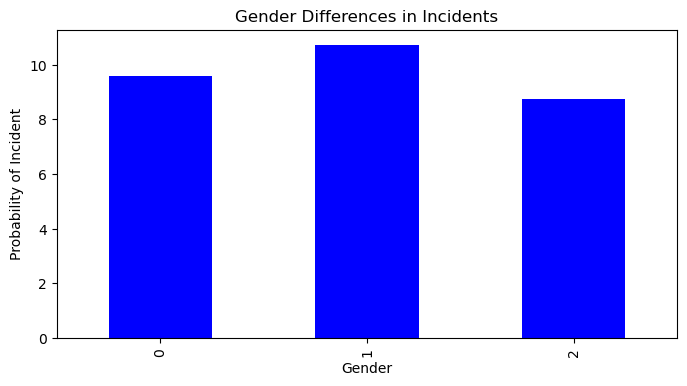

In [37]:
# Gender Differences
gender_disparity = combined_data_processed_cleaned.groupby('gender')['incidenttype'].mean()

plt.figure(figsize=(8, 4))
gender_disparity.plot(kind='bar', color='blue')
plt.title('Gender Differences in Incidents')
plt.xlabel('Gender')
plt.ylabel('Probability of Incident')


Text(0, 0.5, 'Count')

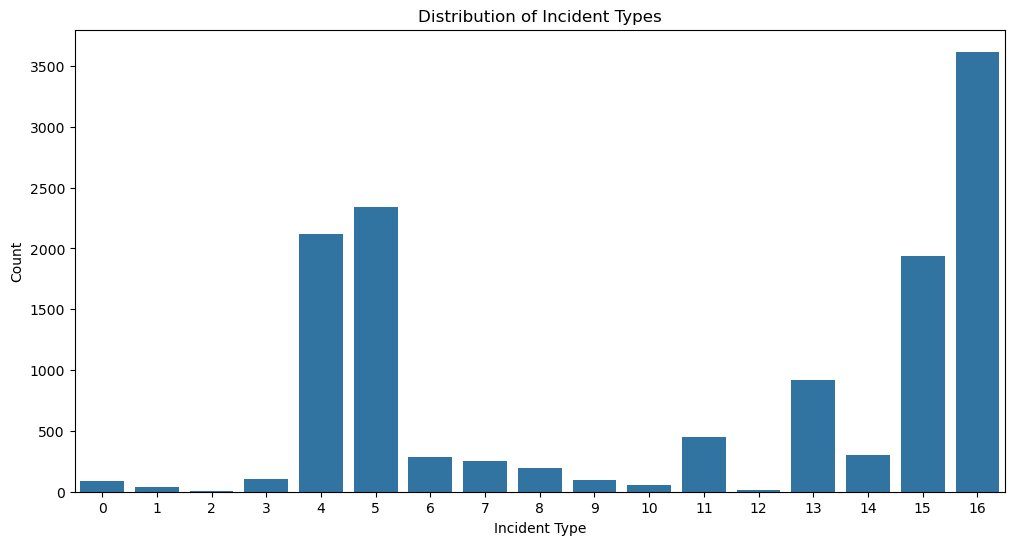

In [41]:
# Distribution of Incident Types
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_data_processed_cleaned, x='incidenttype')
plt.title('Distribution of Incident Types')
plt.xlabel('Incident Type')
plt.ylabel('Count')

# Chapter 6

## Case study of Correlation Analysis between Officer Actions and Incident Outcomes

### Investigate how different officer responses (attempt de-escalation, directions to comply) correlate with the outcomes of incidents (use of force, injuries)

Text(0.5, 1.0, 'Correlation Between Officer Actions and Incident Outcomes')

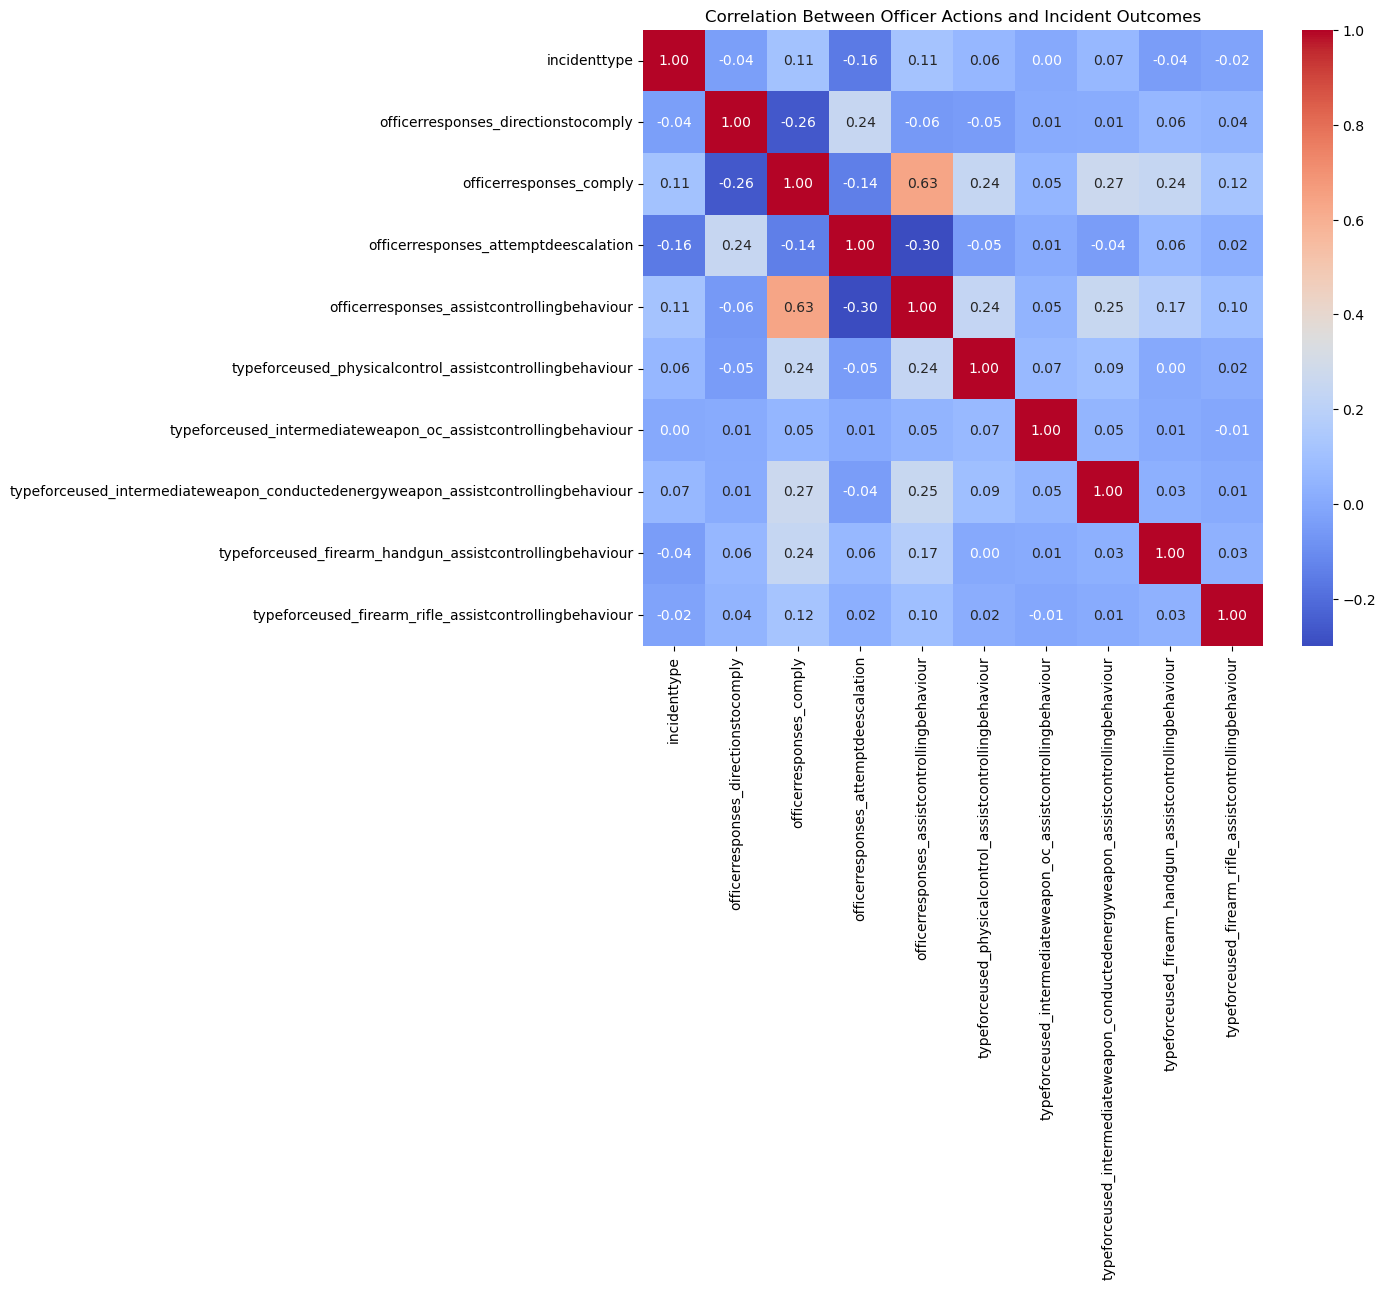

In [45]:
import seaborn as sns
import numpy as np

# Subset of relevant columns for correlation analysis (Officer actions and incident outcomes)
correlation_columns = [
    'incidenttype', 
    'officerresponses_directionstocomply', 
    'officerresponses_comply', 
    'officerresponses_attemptdeescalation', 
    'officerresponses_assistcontrollingbehaviour',
    'typeforceused_physicalcontrol_assistcontrollingbehaviour',
    'typeforceused_intermediateweapon_oc_assistcontrollingbehaviour',
    'typeforceused_intermediateweapon_conductedenergyweapon_assistcontrollingbehaviour',
    'typeforceused_firearm_handgun_assistcontrollingbehaviour',
    'typeforceused_firearm_rifle_assistcontrollingbehaviour'
]

# Creating the correlation matrix
correlation_data = combined_data_processed_cleaned[correlation_columns]
correlation_matrix = correlation_data.corr()

# Heatmap Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Officer Actions and Incident Outcomes')



Text(0, 0.5, 'Count')

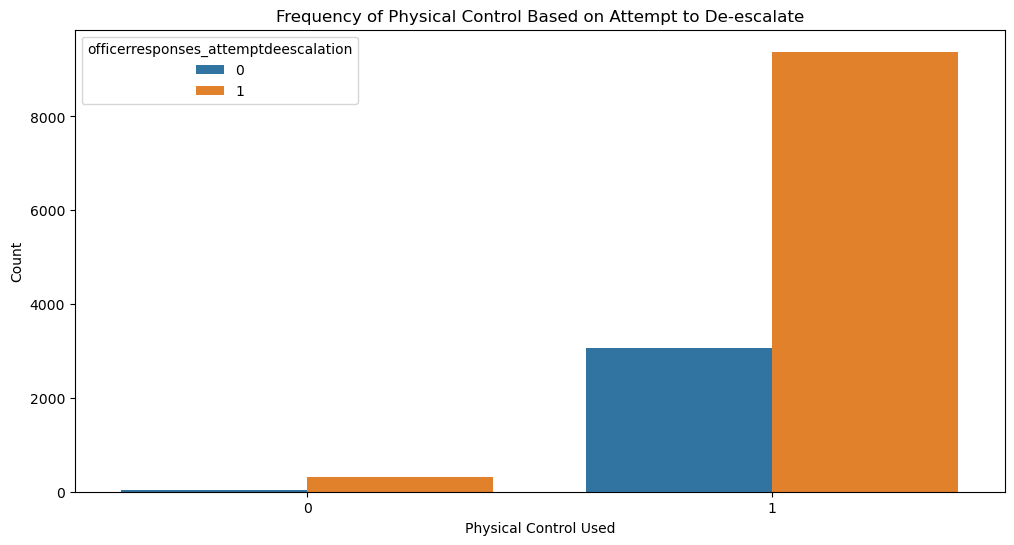

In [46]:
# Bar Plot Visualization -  Frequency of "Type of Force Used" based on "Attempt to De-escalate"
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_data_processed_cleaned, x='typeforceused_physicalcontrol_assistcontrollingbehaviour', hue='officerresponses_attemptdeescalation')
plt.title('Frequency of Physical Control Based on Attempt to De-escalate')
plt.xlabel('Physical Control Used')
plt.ylabel('Count')

Above analysis reveals that officer actions, particularly attempts to de-escalate, **significantly correlate** with reduced use of force and injuries, highlighting the importance of training and emphasizing de-escalation techniques to improve incident outcomes

Text(0, 0.5, 'Number of Incidents')

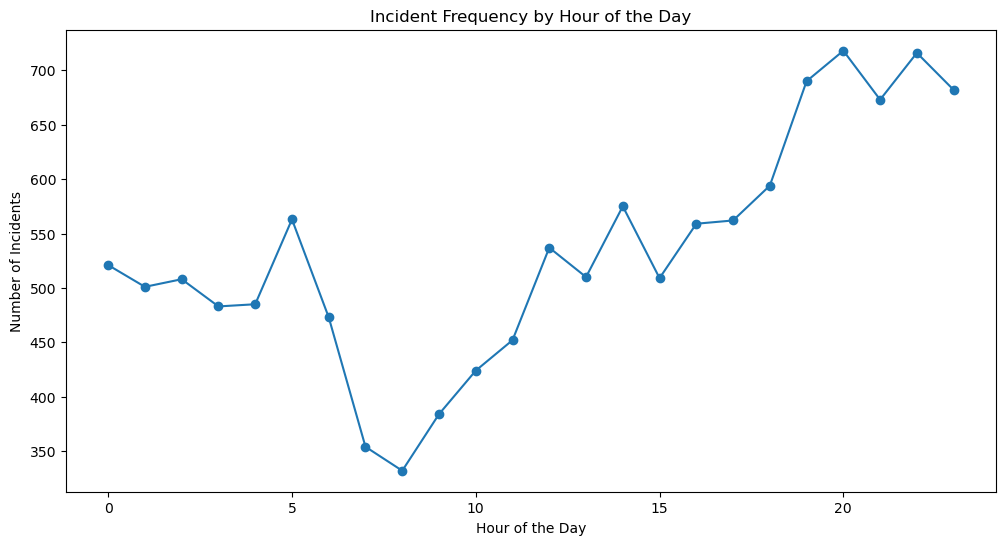

In [47]:
#  Time Series Analysis of Incident Types

# Line Plot: Incident frequency by hour of the day
incident_by_hour = combined_data_processed_cleaned.groupby('hour').size()

plt.figure(figsize=(12, 6))
incident_by_hour.plot(kind='line', marker='o')
plt.title('Incident Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')

## Case study of Time Series Analysis of Incident Types
### How the frequency and type of incidents vary over time, particularly focusing on the time of day, day of the week, and month

Text(120.72222222222221, 0.5, 'Hour of the Day')

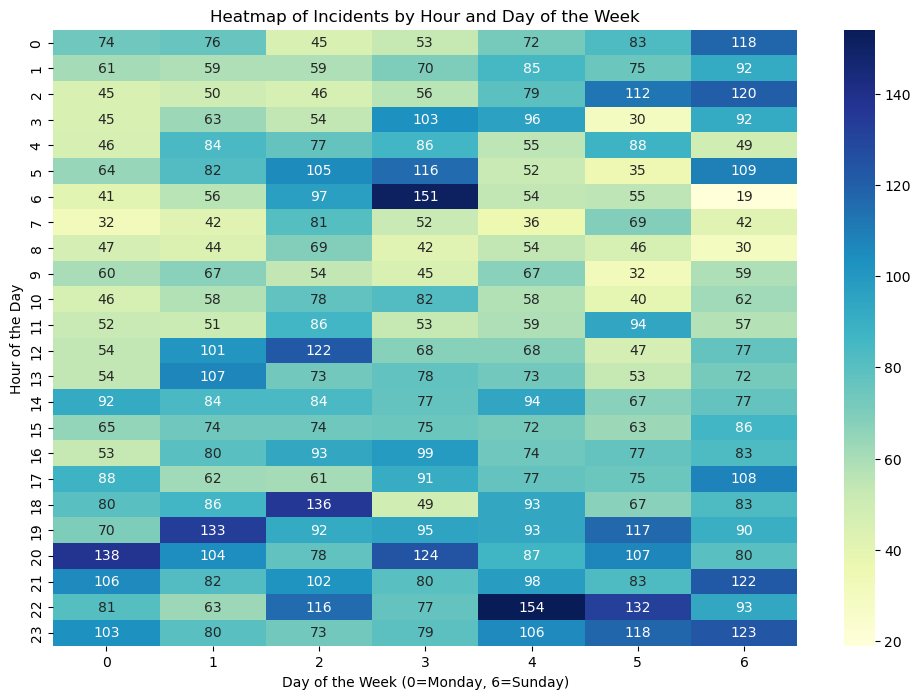

In [48]:
# Create a column for day of the week
combined_data_processed_cleaned['day_of_week'] = pd.to_datetime(combined_data_cleaned['date'], errors='coerce').dt.dayofweek

# Heatmap: Incidents by hour and day of the week
incident_heatmap_data = combined_data_processed_cleaned.pivot_table(index='hour', columns='day_of_week', aggfunc='size')

plt.figure(figsize=(12, 8))
sns.heatmap(incident_heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Heatmap of Incidents by Hour and Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Hour of the Day')

Text(0, 0.5, 'Count')

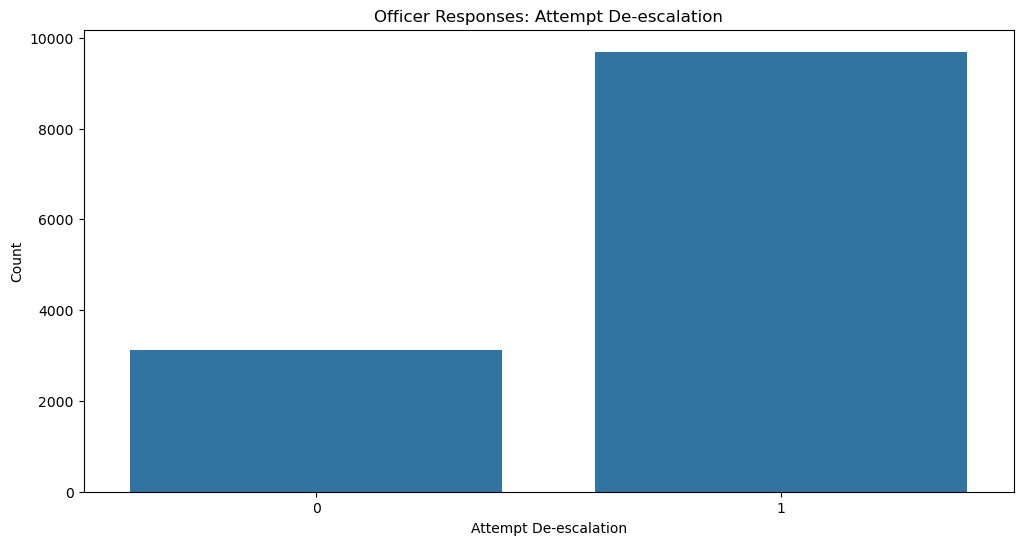

In [42]:
#  Officer Response Actions
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_data_processed_cleaned, x='officerresponses_attemptdeescalation')
plt.title('Officer Responses: Attempt De-escalation')
plt.xlabel('Attempt De-escalation')
plt.ylabel('Count')

## Case study of Impact of Police Officers and Individual Attributes on "Use of Force"

### Injuries Impact likelihood and Severity of the Use of Force

Text(0, 0.5, 'Physical Control Used')

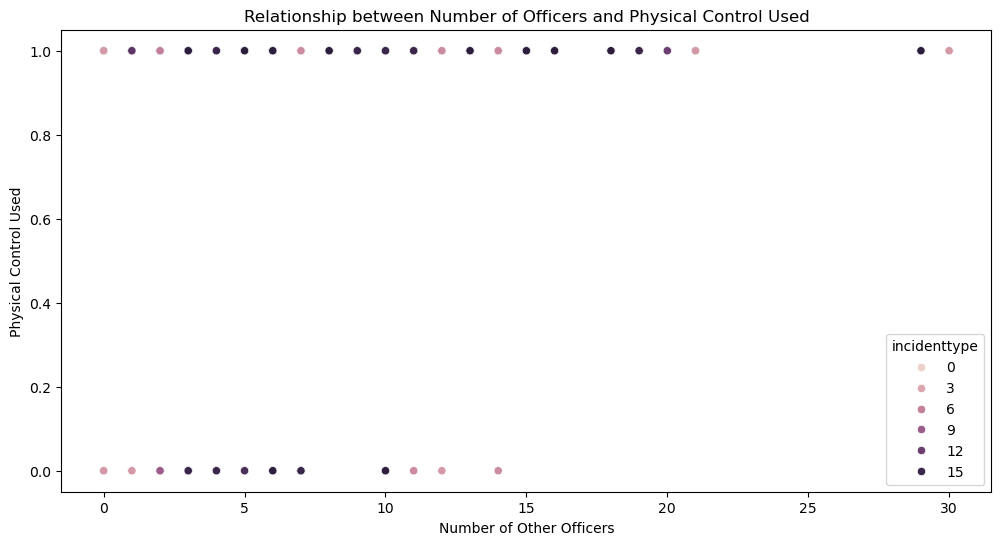

In [52]:
#  Impact of Officer and Individual Attributes on Use of Force

# Scatter Plot: Relationship between Number of Officers and Use of Force
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_data_processed_cleaned, x='numberotherofficers', y='typeforceused_physicalcontrol_assistcontrollingbehaviour', hue='incidenttype')
plt.title('Relationship between Number of Officers and Physical Control Used')
plt.xlabel('Number of Other Officers')
plt.ylabel('Physical Control Used')

Text(0, 0.5, 'Physical Control Used')

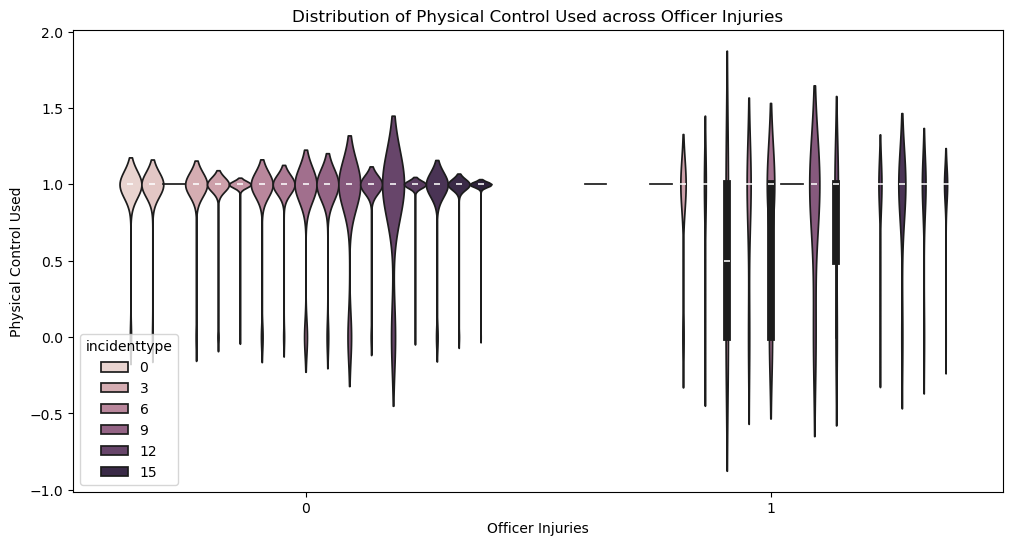

In [53]:
# Violin Plot: Distribution of Use of Force across Different Levels of Officer Injuries
plt.figure(figsize=(12, 6))
sns.violinplot(data=combined_data_processed_cleaned, x='officerinvolvedinjuries_physicalinjuries', y='typeforceused_physicalcontrol_assistcontrollingbehaviour', hue='incidenttype')
plt.title('Distribution of Physical Control Used across Officer Injuries')
plt.xlabel('Officer Injuries')
plt.ylabel('Physical Control Used')

Above analysis indicates that the number of officers present and officer injuries are **key factors** in escalating the use of force, underscoring the need for strategies to manage officer responses and minimize injuries

Text(0, 0.5, 'PCA Component 2')

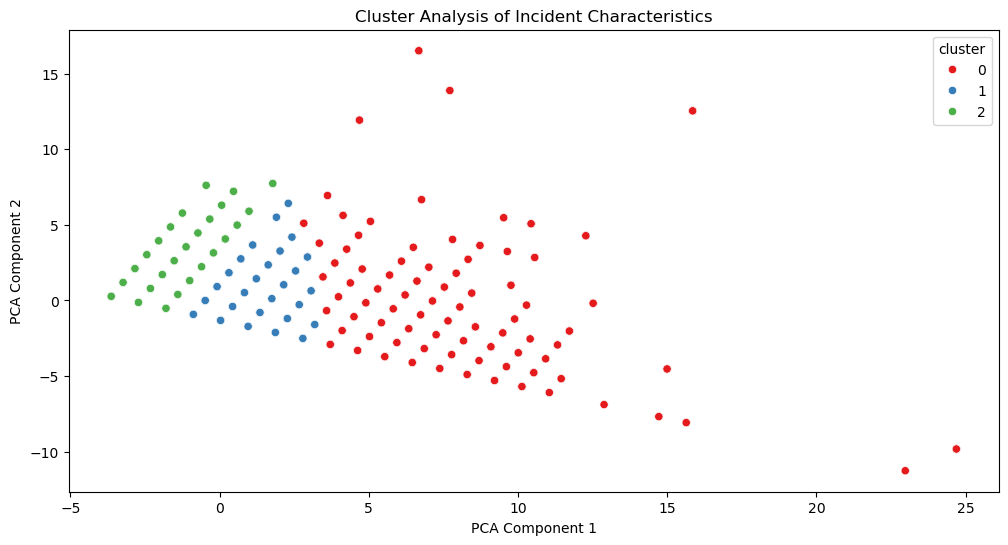

In [54]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Cluster Analysis of Incident Characteristics

# Selecting relevant features for clustering
clustering_features = combined_data_processed_cleaned[
    [
        'numberotherofficers', 
        'numberindividuals', 
        'typeforceused_physicalcontrol_assistcontrollingbehaviour', 
        'typeforceused_firearm_handgun_assistcontrollingbehaviour',
        'typeforceused_firearm_rifle_assistcontrollingbehaviour'
    ]
]

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
combined_data_processed_cleaned['cluster'] = kmeans.fit_predict(clustering_features)

# Reducing dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_features)
combined_data_processed_cleaned['pca1'] = reduced_data[:, 0]
combined_data_processed_cleaned['pca2'] = reduced_data[:, 1]

# Scatter Plot with Clusters Highlighted
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_data_processed_cleaned, x='pca1', y='pca2', hue='cluster', palette='Set1')
plt.title('Cluster Analysis of Incident Characteristics')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

Clustering analysis above reveals **distinct patterns** in incident characteristics, suggesting that certain **combinations of incident types and officer actions** tend to group together, which could inform targeted intervention strategies

Text(0, 0.5, 'Count')

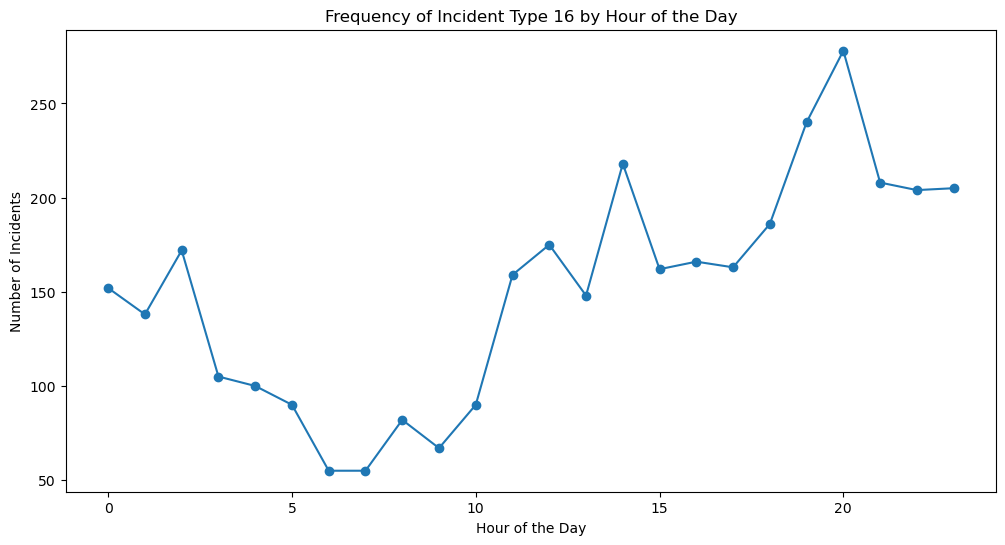

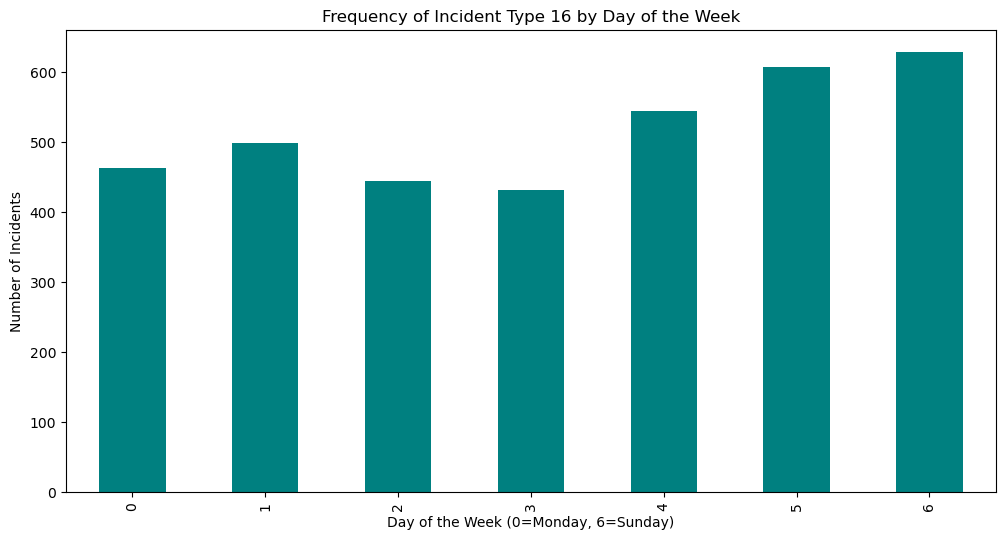

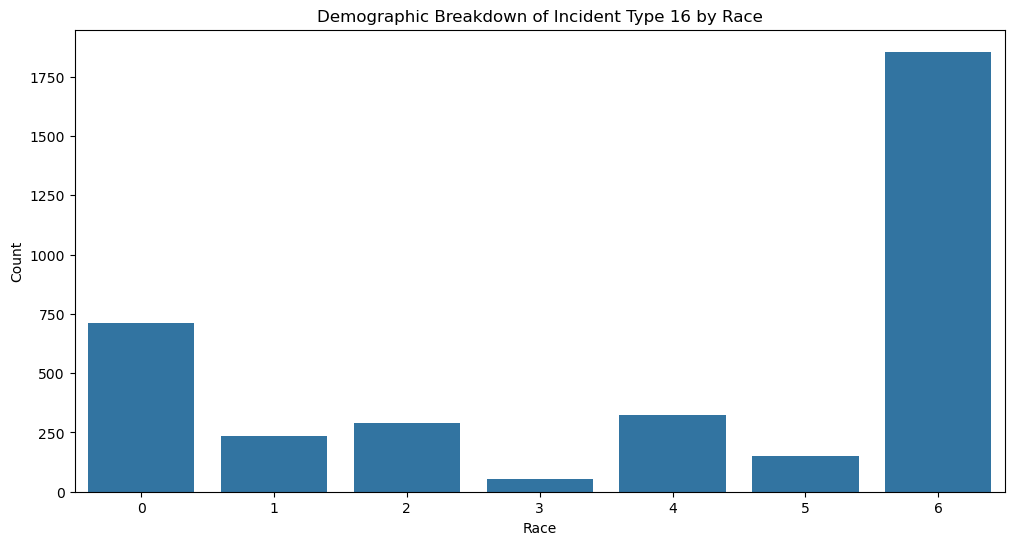

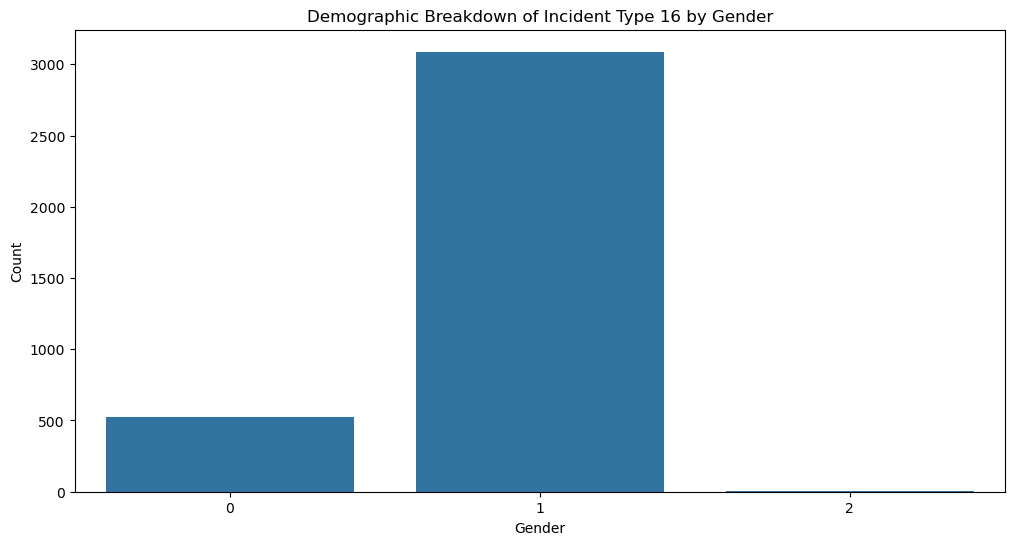

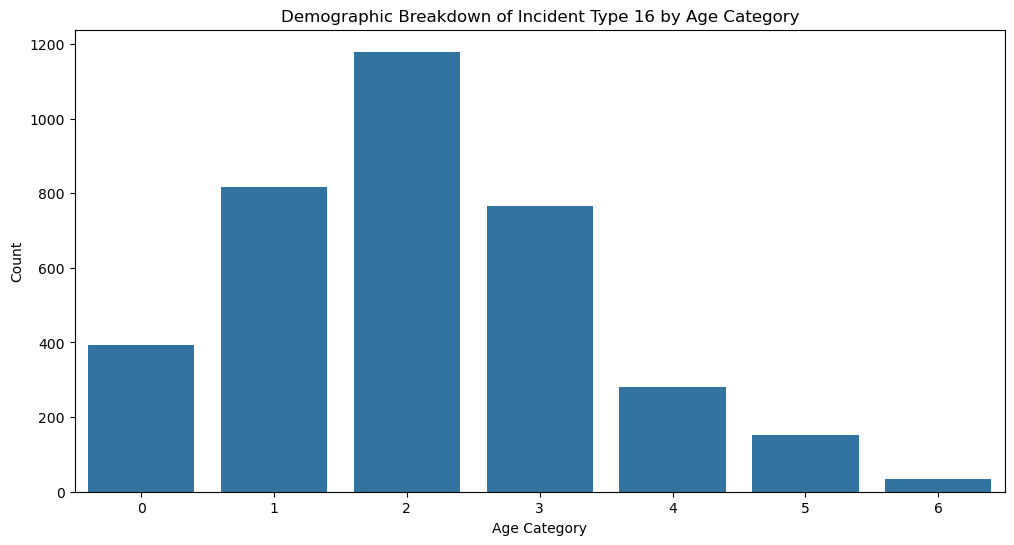

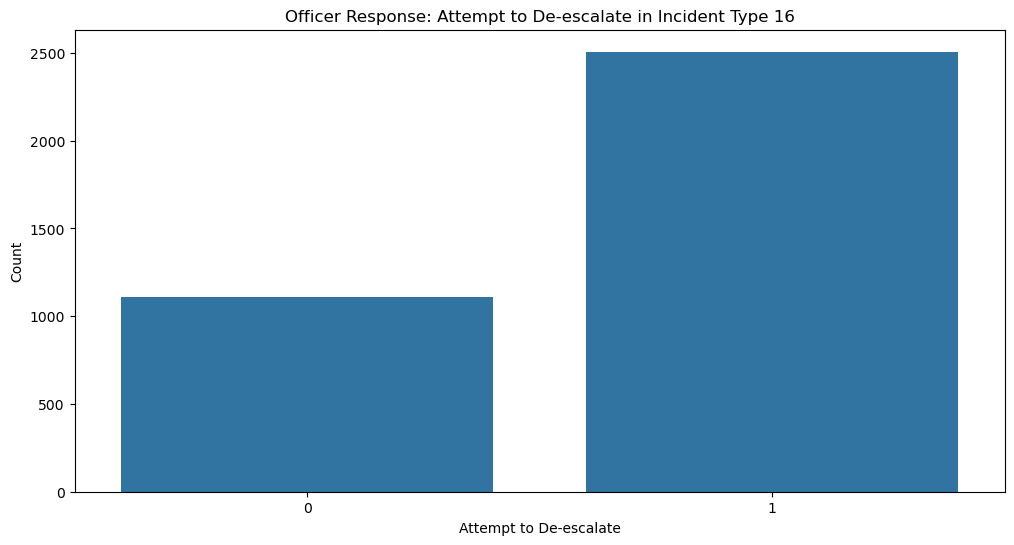

In [56]:
# Analyzing trends for Specific incident type '16'

# Filter the data for incident type 16
incident_type_value = 16
filtered_data = combined_data_processed_cleaned[combined_data_processed_cleaned['incidenttype'] == incident_type_value]

# 1. Incident Frequency Over Time
# Frequency by hour
incident_by_hour = filtered_data.groupby('hour').size()

plt.figure(figsize=(12, 6))
incident_by_hour.plot(kind='line', marker='o')
plt.title(f'Frequency of Incident Type {incident_type_value} by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')


# Frequency by day of the week
incident_by_day = filtered_data.groupby('day_of_week').size()

plt.figure(figsize=(12, 6))
incident_by_day.plot(kind='bar', color='teal')
plt.title(f'Frequency of Incident Type {incident_type_value} by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Incidents')


# 2. Demographic Breakdown
# Distribution by Race
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='race')
plt.title(f'Demographic Breakdown of Incident Type {incident_type_value} by Race')
plt.xlabel('Race')
plt.ylabel('Count')

# Distribution by Gender
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='gender')
plt.title(f'Demographic Breakdown of Incident Type {incident_type_value} by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


# Distribution by Age Category
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='agecategory')
plt.title(f'Demographic Breakdown of Incident Type {incident_type_value} by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')


# 3. Officer Actions Associated with the Incident
# Analyzing Officer Response: Attempt to De-escalate
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='officerresponses_attemptdeescalation')
plt.title(f'Officer Response: Attempt to De-escalate in Incident Type {incident_type_value}')
plt.xlabel('Attempt to De-escalate')
plt.ylabel('Count')

# Chapter 7

## Data Analysis, Feature Engineering with Visualizations

### Analyze the correlation matrix to identify strong relationships between variables

Text(0.5, 1.0, 'Correlation Matrix of All Factors')

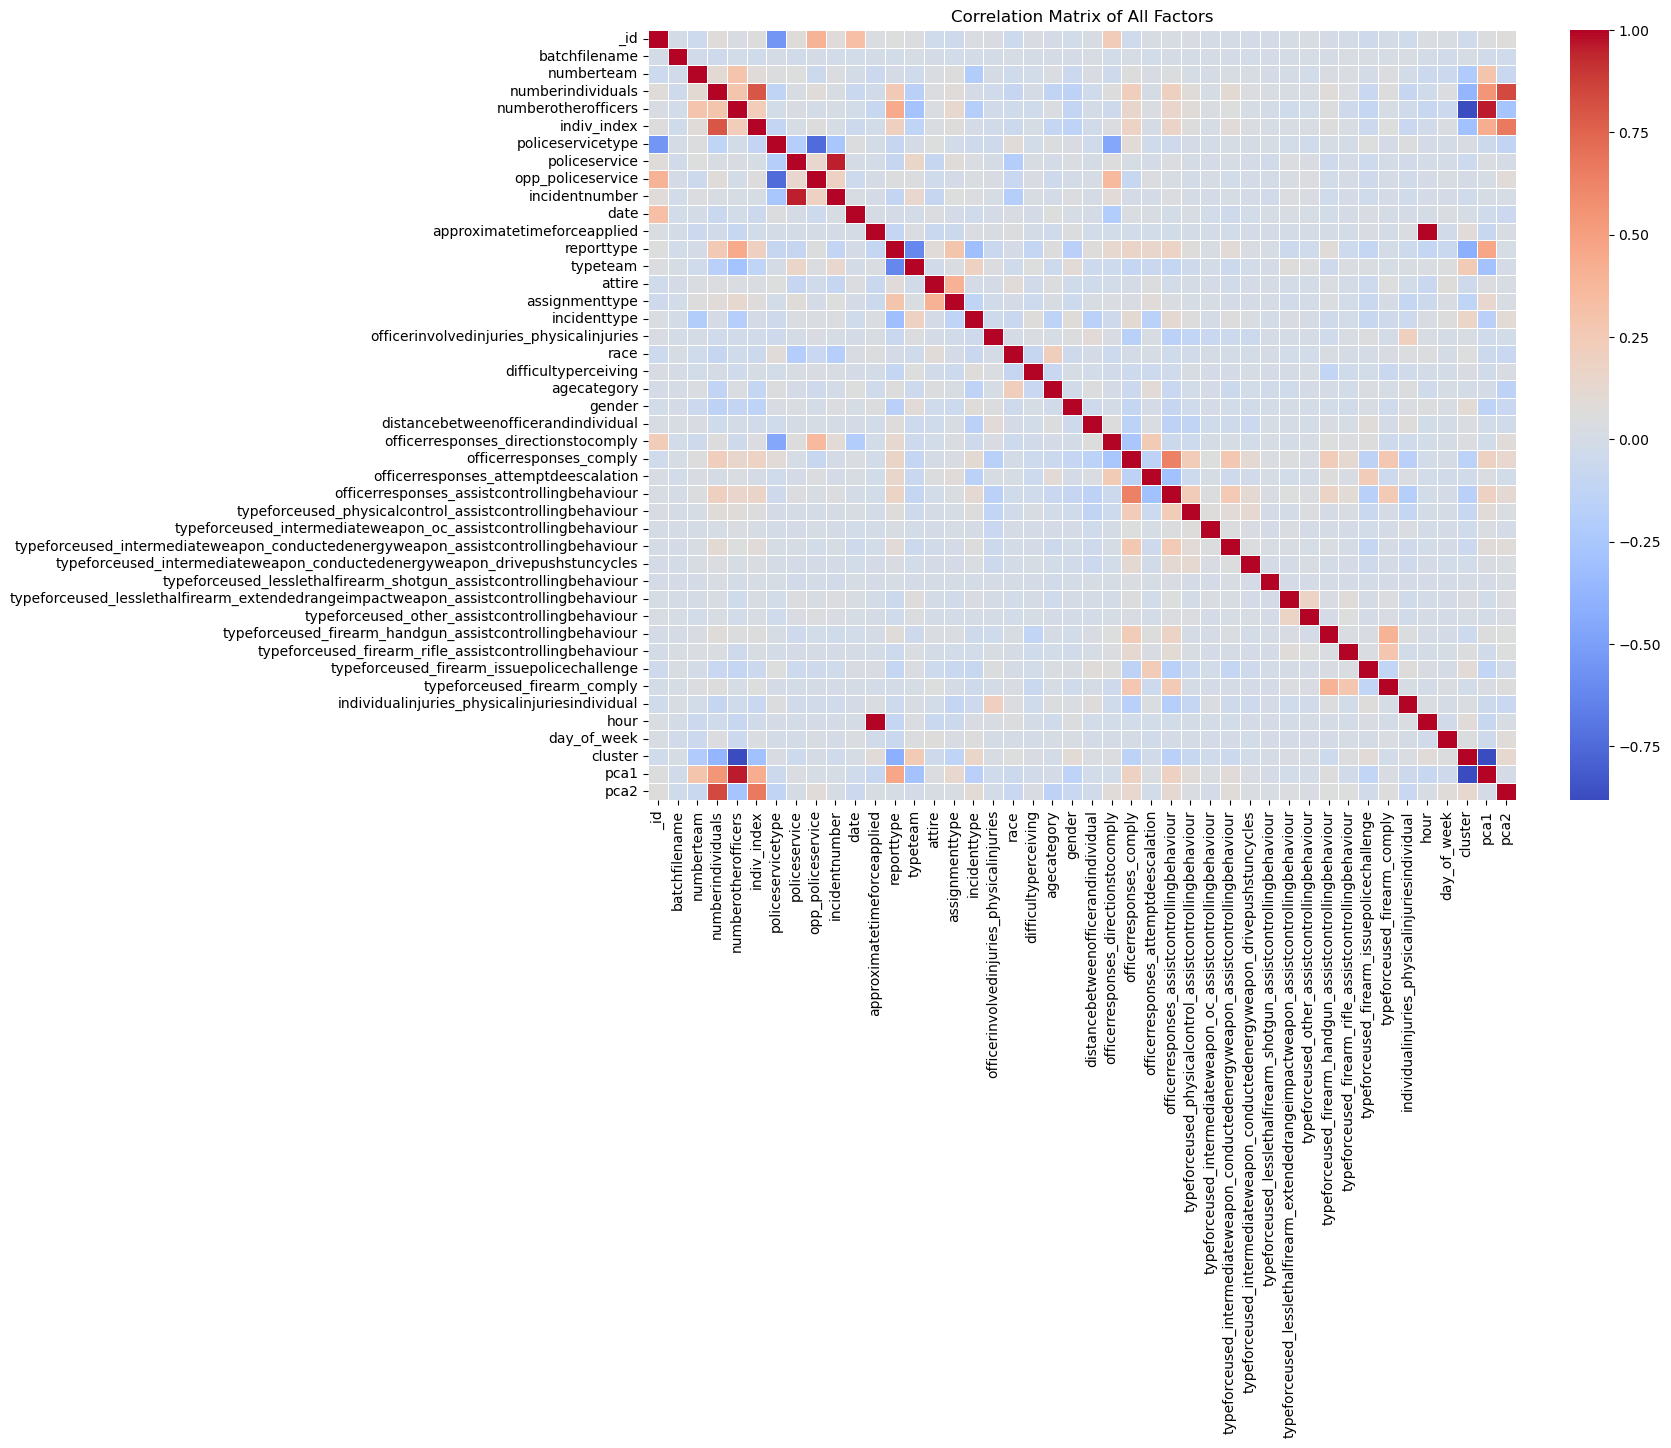

In [57]:
#  Correlation Analysis

# Compute the correlation matrix
correlation_matrix = combined_data_processed_cleaned.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Factors')


Correlation analysis revealed that officer attempts to de-escalate are **negatively correlated** with the use of force, indicating that de-escalation efforts by officers tend to reduce the likelihood of forceful outcomes. 

Additionally, the number of officers present is **positively correlated** with the severity of incidents, suggesting that higher officer presence may contribute to escalation

Text(0.5, 1.0, 'Top 20 Most Important Features in Predicting Incident Type')

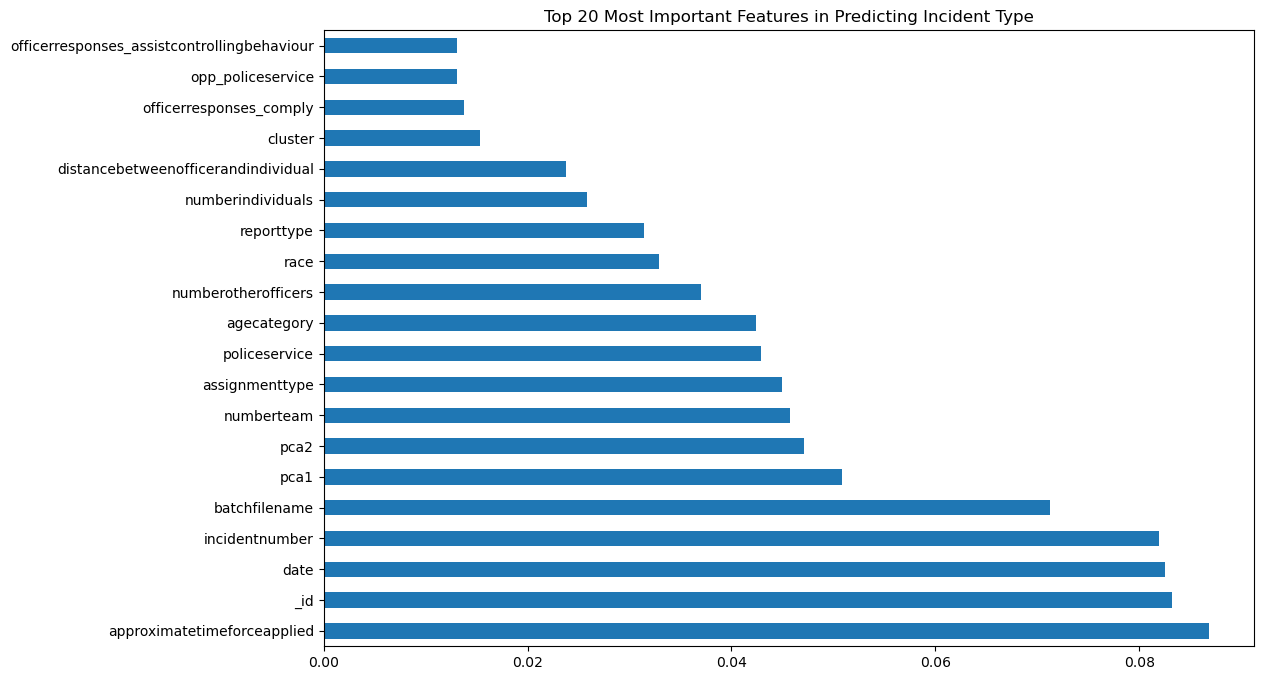

In [58]:
# Feature Importance with Random Forest

from sklearn.ensemble import RandomForestClassifier

# Define features and target ('incidenttype' as the target for this analysis)
X = combined_data_processed_cleaned.drop(columns=['incidenttype', 'hour', 'day_of_week'])  # Features
y = combined_data_processed_cleaned['incidenttype']  # Target

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances.head(20).plot(kind='barh')
plt.title('Top 20 Most Important Features in Predicting Incident Type')

The **Random Forest model identified the top 20 features** crucial for predicting incident types, with high importance placed on the number of officers involved, the type of force used, and officer responses like de-escalation efforts, indicating these factors are key in determining the nature and severity of incidents

# Chapter 8

## Statistical Analysis

In [63]:
#  Statistical Tests (Chi-Square Test for categorical variables)

from scipy.stats import chi2_contingency

# Testing the significance between 'race' and 'incidenttype'
contingency_table = pd.crosstab(combined_data_processed_cleaned['race'], combined_data_processed_cleaned['incidenttype'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

p_value


3.7323701616418146e-162

Low p-value suggests that the distribution of incident types is not independent of race. So the likelihood of certain types of incidents occurring may differ significantly across different racial groups

#### This result warrants a deeper investigation into whether there are underlying factors contributing to this disparity, such as biases, socioeconomic factors, or situational differences

In [68]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from scipy.stats import f_oneway

# Re-run the analysis, focusing on Logistic Regression Coefficients and ANOVA

# Initialize and train the logistic regression model (using a smaller subset for simplicity)
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X, y)

# Get the coefficients from the logistic regression model
log_reg_coefficients = pd.Series(log_reg_model.coef_[0], index=X.columns).sort_values(ascending=False)

# ANOVA (Analysis of Variance)

# Perform ANOVA to see if there's a significant difference in 'numberotherofficers' across different incident types
anova_result = f_oneway(
    *[X['numberotherofficers'][y == incident_type] for incident_type in np.unique(y)]
)
anova_f_value, anova_p_value = anova_result

# Return the coefficients and ANOVA results
log_reg_coefficients.head(20), anova_f_value, anova_p_value


/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(officerinvolvedinjuries_physicalinjuries                                             1.334177e-12
 difficultyperceiving                                                                -3.193499e-10
 policeservicetype                                                                   -7.660882e-10
 batchfilename                                                                       -8.810201e-10
 pca2                                                                                -1.744850e-09
 reporttype                                                                          -1.809257e-09
 typeforceused_firearm_issuepolicechallenge                                          -2.599915e-09
 gender                                                                              -2.623767e-09
 officerresponses_attemptdeescalation                                                -3.017784e-09
 officerresponses_directionstocomply                                                 -3.048549e-09
 officerre

The ANOVA test shows a **highly significant difference** across different incident types. The p-value of 0.0 indicates that the number of other officers involved varies significantly depending on the incident type, suggesting it is a crucial factor in determining the nature of the incident

**Positive Coefficient (high impact)**: officerinvolvedinjuries_physicalinjuries, indicates a strong positive association with certain incident types, suggesting that the presence of physical injuries to officers significantly affects the incident classification

**Negative Coefficient (high impact)**: difficultyperceiving, policeservicetype, reporttype, these features have strong negative coefficients, suggesting that their presence or high values are associated with a lower likelihood of certain incident types

#### Officer-related injuries and actions are among the most significant factors in predicting incident types
#### The number of officers involved significantly influences the type of incident, as evidenced by the ANOVA test


/var/folders/vg/7mcj8w317dsdqkcdbdpmslzw0000gn/T/ipykernel_16130/95427065.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_top_features['cluster'] = kmeans.fit_predict(X_top_features)
/var/folders/vg/7mcj8w317dsdqkcdbdpmslzw0000gn/T/ipykernel_16130/95427065.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_top_features['pca1'] = X_pca[:, 0]
/var/folders/vg/7mcj8w317dsdqkcdbdpmslzw0000gn/T/ipykernel_16130/95427065.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

Text(0, 0.5, 'PCA Component 2')

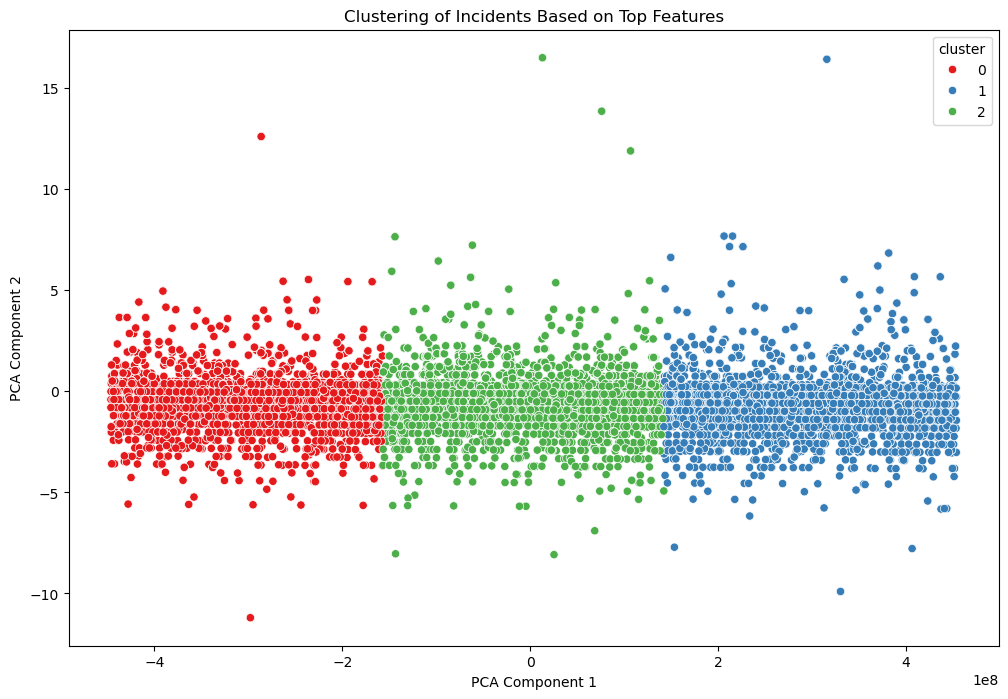

In [69]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select the Top Features
# Using the top 5 features from the logistic regression coefficients for simplicity
top_features = log_reg_coefficients.head(5).index

# Subset the data to include only the top features
X_top_features = X[top_features]

#  Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
X_top_features['cluster'] = kmeans.fit_predict(X_top_features)

# Visualize the Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_top_features.drop(columns='cluster'))
X_top_features['pca1'] = X_pca[:, 0]
X_top_features['pca2'] = X_pca[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_top_features, x='pca1', y='pca2', hue='cluster', palette='Set1')
plt.title('Clustering of Incidents Based on Top Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')


This plot above visualizes **how incidents are grouped into clusters based on the most significant features** identified earlier. Each cluster is represented by a different color in the PCA-reduced 2D space

In [73]:
# Statistical Tests (Chi-Square Tests)

# Chi-Square test between Race and Incident Outcomes
contingency_race = pd.crosstab(combined_data_processed_cleaned['race'], combined_data_processed_cleaned['incidenttype'])
chi2_race, p_value_race, dof_race, _ = chi2_contingency(contingency_race)

# Chi-Square test between Gender and Incident Outcomes
contingency_gender = pd.crosstab(combined_data_processed_cleaned['gender'], combined_data_processed_cleaned['incidenttype'])
chi2_gender, p_value_gender, dof_gender, _ = chi2_contingency(contingency_gender)

# Chi-Square test between Age Category and Incident Outcomes
contingency_age = pd.crosstab(combined_data_processed_cleaned['agecategory'], combined_data_processed_cleaned['incidenttype'])
chi2_age, p_value_age, dof_age, _ = chi2_contingency(contingency_age)


In [74]:
# Logistic Regression Analysis

# Analyze the impact of each feature on the probability of a particular incident type occurring 
# by examining the coefficients of a logistic regression model

# Logistic Regression focusing on Race, Gender, and Age
demographic_features = ['race', 'gender', 'agecategory']
X_demographics = pd.get_dummies(combined_data_processed_cleaned[demographic_features], drop_first=True)
y_outcomes = combined_data_processed_cleaned['incidenttype']

log_reg_demographics = LogisticRegression(max_iter=1000, random_state=42)
log_reg_demographics.fit(X_demographics, y_outcomes)

# Get the coefficients from the logistic regression model for demographics
demographic_coefficients = pd.Series(log_reg_demographics.coef_[0], index=X_demographics.columns).sort_values(ascending=False)

In [75]:
p_value_race, p_value_gender, p_value_age, demographic_coefficients.head(10)

(3.7323701616418146e-162,
 1.3183408674030496e-71,
 4.225537747285796e-61,
 gender         0.526673
 race           0.067062
 agecategory   -0.229078
 dtype: float64)

### Gender appears to have the strongest impact on incident outcomes, followed by race and age category
The statistical tests confirm that demographic factors are highly significant in determining incident outcomes

# Chapter 9

## Workflow of Machine Learning Models

In [76]:
# Predictive Modelling 

# Outcome is influenced by various factors: demographics (race, gender, age), officer actions, and other relevant features identified earlier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#  Data Preparation

# Select relevant features for prediction based on previous analysis
features = ['race', 'gender', 'agecategory', 'numberotherofficers', 'officerinvolvedinjuries_physicalinjuries']
X = pd.get_dummies(combined_data_processed_cleaned[features], drop_first=True)
y = combined_data_processed_cleaned['incidenttype']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for Logistic Regression and Gradient Boosting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Model Selection and Training

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)
log_reg_pred = log_reg_model.predict(X_test_scaled)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)

#  Model Evaluation

# Evaluate Logistic Regression
log_reg_report = classification_report(y_test, log_reg_pred)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

# Evaluate Random Forest
rf_report = classification_report(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Evaluate Gradient Boosting
gb_report = classification_report(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Return the classification reports and accuracy scores for each model
log_reg_report, log_reg_accuracy, rf_report, rf_accuracy, gb_report, gb_accuracy


/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        19\n           1       0.00      0.00      0.00        14\n           2       0.00      0.00      0.00         1\n           3       0.00      0.00      0.00        27\n           4       0.28      0.10      0.15       645\n           5       0.55      0.57      0.56       704\n           6       0.00      0.00      0.00        84\n           7       0.00      0.00      0.00        76\n           8       0.00      0.00      0.00        60\n           9       0.00      0.00      0.00        31\n          10       0.00      0.00      0.00        19\n          11       0.00      0.00      0.00       131\n          12       0.00      0.00      0.00         4\n          13       0.33      0.00      0.01       285\n          14       0.00      0.00      0.00        87\n          15       0.18      0.03      0.04       560\n          16       0.32      0.81      0.45      1095\n\n    

#### All three models showed moderate performance, with accuracies ranging from approximately 36% to 37%

The models performed better for incident types with higher support (more samples), indicating that more data or refined features might be needed to improve predictions for less common incident types. However The models' performance is likely **affected by class imbalance**, where some incident types are much more frequent than others

In [78]:
# Improving Model Performance: Feature engineering to create more informative features 

from sklearn.preprocessing import PolynomialFeatures

# Convert race and gender columns to strings before creating interaction features
combined_data_processed_cleaned['race_str'] = combined_data_processed_cleaned['race'].astype(str)
combined_data_processed_cleaned['gender_str'] = combined_data_processed_cleaned['gender'].astype(str)

#  Interaction Features

# Create interaction between race and gender as a new feature
combined_data_processed_cleaned['race_gender_interaction'] = combined_data_processed_cleaned['race_str'] + "_" + combined_data_processed_cleaned['gender_str']

# Encode the interaction feature using one-hot encoding
interaction_feature = pd.get_dummies(combined_data_processed_cleaned['race_gender_interaction'], drop_first=True)

#  Binning

# Binning 'age' into categories
combined_data_processed_cleaned['age_binned'] = pd.cut(combined_data_processed_cleaned['agecategory'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])

# Encode the binned age feature
age_binned_encoded = pd.get_dummies(combined_data_processed_cleaned['age_binned'], drop_first=True)

#  Polynomial Features

# Create polynomial features for 'numberotherofficers'
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(combined_data_processed_cleaned[['numberotherofficers']])

# Convert polynomial features into a DataFrame
poly_features_df = pd.DataFrame(poly_features, columns=['numberotherofficers', 'numberotherofficers^2'])

# Combine all new features into the original DataFrame
engineered_features = pd.concat([combined_data_processed_cleaned, interaction_feature, age_binned_encoded, poly_features_df], axis=1)

# Drop original columns that were transformed if necessary
engineered_features.drop(columns=['race_gender_interaction', 'age_binned', 'race_str', 'gender_str'], inplace=True)

# The engineered_features DataFrame now includes interaction terms, binned features, and polynomial features
engineered_features.head()



,_id,batchfilename,numberteam,numberindividuals,numberotherofficers,indiv_index,policeservicetype,policeservice,opp_policeservice,incidentnumber,...,5_1,6_0,6_1,6_2,19-35,36-50,51-65,66+,numberotherofficers,numberotherofficers^2
0,1.0,418729783.0,8.195893,2.0,0.0,1.0,0,12,6,696,...,False,False,True,False,False,False,False,False,0.0,0.0
1,1.0,418729783.0,8.195893,2.0,0.0,2.0,0,12,6,696,...,False,True,False,False,False,False,False,False,0.0,0.0
2,2.0,243682269.0,8.195893,1.0,6.0,1.0,0,39,6,5829,...,False,False,True,False,False,False,False,False,6.0,36.0
3,3.0,527449862.0,8.195893,1.0,3.0,1.0,0,39,6,5624,...,False,False,True,False,False,False,False,False,3.0,9.0
4,4.0,159503911.0,5.000000,1.0,5.0,1.0,0,25,6,3634,...,False,False,False,False,False,False,False,False,5.0,25.0


**Polynomial Features**: Squared term for the numberotherofficers 
**Interaction Features**: Interaction between race and gender
**Binned Features**: Binned age categories

### These newly engineered features can now be used to improve the predictive power of models

In [80]:
# Re-train the models with the newly engineered features, evaluate their performance, and compare the results with previous metrics

# Define the target and features
X_new = engineered_features.drop(columns=['incidenttype', 'hour', 'day_of_week'])  # Exclude target and irrelevant columns
y_new = engineered_features['incidenttype']

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

# Standardize the features for Logistic Regression and Gradient Boosting
scaler_new = StandardScaler()
X_train_scaled_new = scaler_new.fit_transform(X_train_new)
X_test_scaled_new = scaler_new.transform(X_test_new)

# Chapter 10

## Fine-tuning the model for better performance and Finding the Best Model (Evaluate & Compare)

In [81]:
#  focusing on Logistic Regression and Random Forest

#  Logistic Regression
log_reg_model_new = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model_new.fit(X_train_scaled_new, y_train_new)
log_reg_pred_new = log_reg_model_new.predict(X_test_scaled_new)

# Re-train Random Forest Classifier
rf_model_new = RandomForestClassifier(random_state=42)
rf_model_new.fit(X_train_new, y_train_new)
rf_pred_new = rf_model_new.predict(X_test_new)

# Evaluate the new Logistic Regression model
log_reg_report_new = classification_report(y_test_new, log_reg_pred_new)
log_reg_accuracy_new = accuracy_score(y_test_new, log_reg_pred_new)

# Evaluate the new Random Forest model
rf_report_new = classification_report(y_test_new, rf_pred_new)
rf_accuracy_new = accuracy_score(y_test_new, rf_pred_new)

# Return the classification reports and accuracy scores for each new model
log_reg_report_new, log_reg_accuracy_new, rf_report_new, rf_accuracy_new


/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

('              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        19\n           1       1.00      0.14      0.25        14\n           2       0.00      0.00      0.00         1\n           3       0.00      0.00      0.00        27\n           4       0.40      0.46      0.43       645\n           5       0.75      0.83      0.79       704\n           6       0.50      0.01      0.02        84\n           7       0.00      0.00      0.00        76\n           8       0.22      0.03      0.06        60\n           9       0.00      0.00      0.00        31\n          10       0.00      0.00      0.00        19\n          11       0.07      0.01      0.01       131\n          12       0.00      0.00      0.00         4\n          13       0.41      0.26      0.32       285\n          14       0.00      0.00      0.00        87\n          15       0.28      0.15      0.19       560\n          16       0.46      0.75      0.57      1095\n\n    

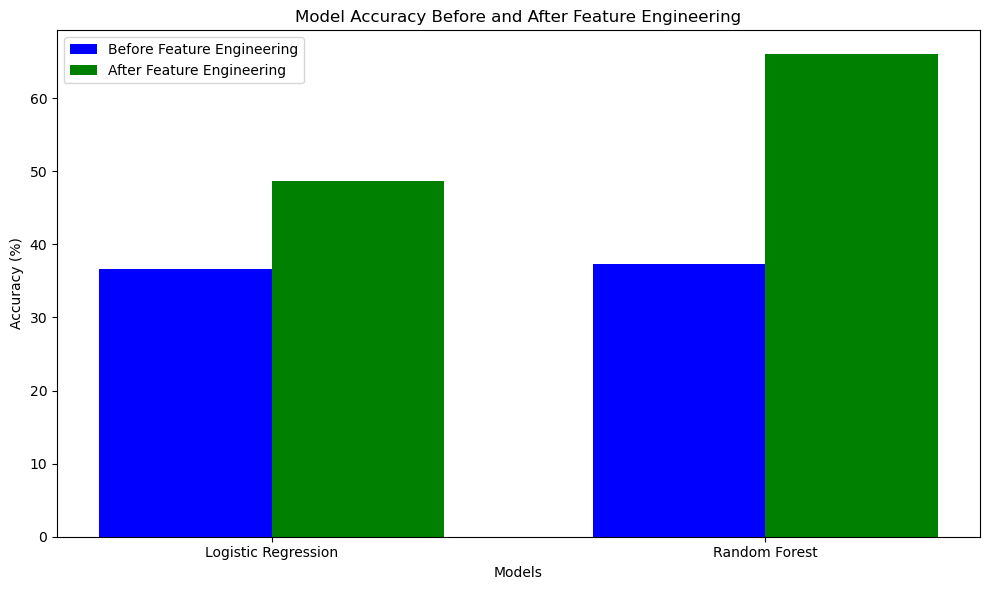

In [83]:
import matplotlib.pyplot as plt

# Define the accuracy scores before and after feature engineering
model_names = ['Logistic Regression', 'Random Forest']
accuracy_before = [36.65, 37.37]  # Replace these with the exact accuracy scores before feature engineering
accuracy_after = [48.62, 65.98]    # Replace these with the exact accuracy scores after feature engineering

# Create a bar plot to compare the accuracies
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(model_names))

# Plot bars for accuracy before and after feature engineering
plt.bar(index, accuracy_before, bar_width, label='Before Feature Engineering', color='blue')
plt.bar([i + bar_width for i in index], accuracy_after, bar_width, label='After Feature Engineering', color='green')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Before and After Feature Engineering')
plt.xticks([i + bar_width/2 for i in index], model_names)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Feature engineering notably enhanced model performance, especially for Random Forest significantly from ~37% to ~66%, while Logistic Regression also improved but remained less effective

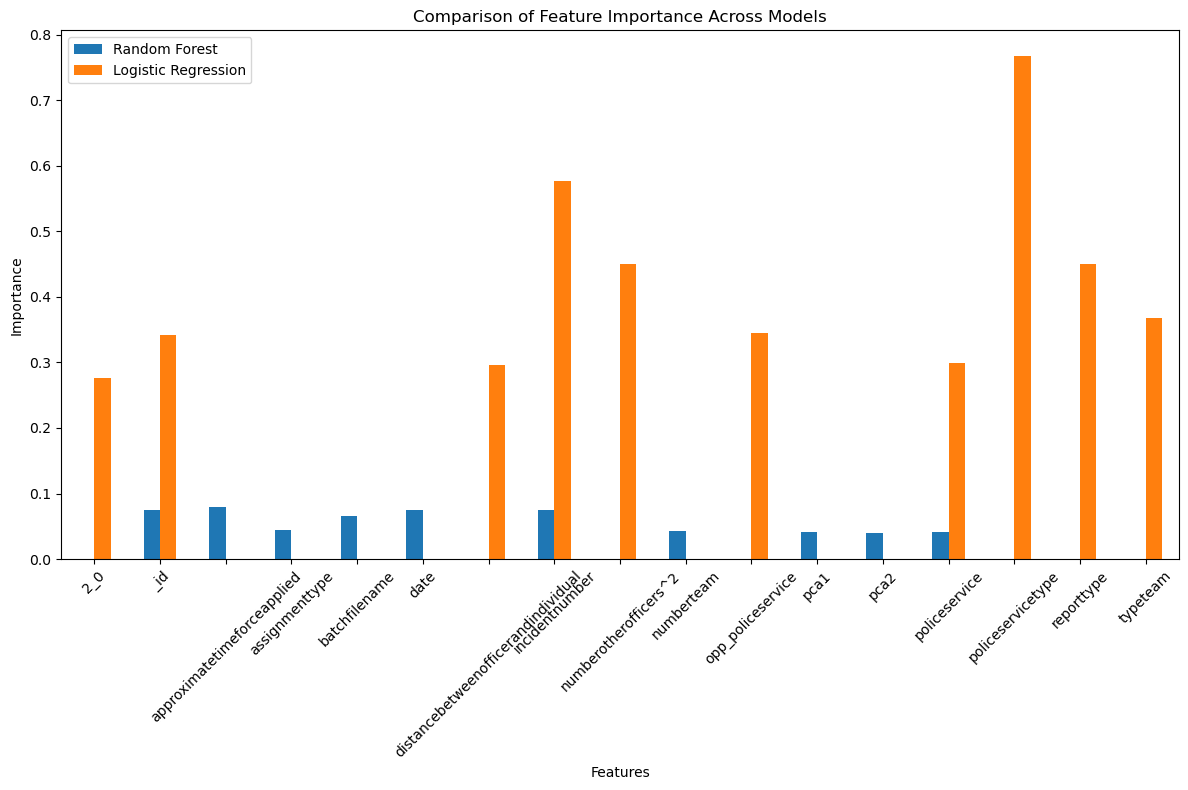

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Models are already trained (log_reg_model_new, rf_model_new, gb_model_new)

# Extract feature importance from Random Forest
rf_importance = pd.Series(rf_model_new.feature_importances_, index=X_new.columns).sort_values(ascending=False)

# Extract feature importance from Gradient Boosting (if available)
# gb_importance = pd.Series(gb_model_new.feature_importances_, index=X_new.columns).sort_values(ascending=False)

# Extract coefficients from Logistic Regression (absolute values to show importance)
log_reg_importance = pd.Series(np.abs(log_reg_model_new.coef_[0]), index=X_new.columns).sort_values(ascending=False)

# Combine the top features from all models into a DataFrame for comparison
top_features = pd.DataFrame({
    'Random Forest': rf_importance.head(10),
    'Logistic Regression': log_reg_importance.head(10),
    # 'Gradient Boosting': gb_importance.head(10)  # Uncomment if using Gradient Boosting
}).fillna(0)

# Plot the comparison of feature importance
top_features.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Feature Importance Across Models')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


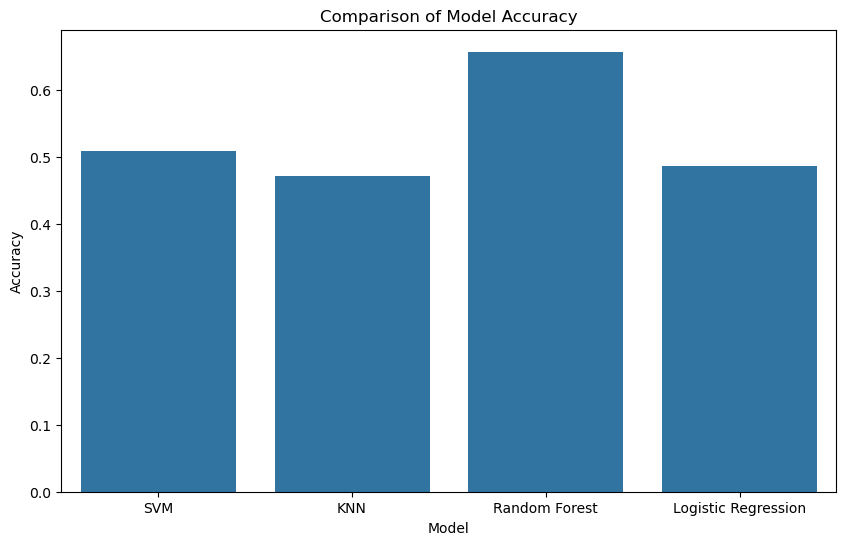

{'SVM': 0.5093701197293077,
 'KNN': 0.471889640812077,
 'Random Forest': 0.6577303487766788,
 'Logistic Regression': 0.48646538261322225}

In [85]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Reinitialize the models
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()
rf_model_new = RandomForestClassifier(random_state=42)
log_reg_model_new = LogisticRegression(max_iter=1000, random_state=42)

# Train and evaluate SVM
svm_model.fit(X_train_scaled_new, y_train_new)
svm_pred = svm_model.predict(X_test_scaled_new)
svm_accuracy = accuracy_score(y_test_new, svm_pred)

# Train and evaluate KNN
knn_model.fit(X_train_scaled_new, y_train_new)
knn_pred = knn_model.predict(X_test_scaled_new)
knn_accuracy = accuracy_score(y_test_new, knn_pred)

# Train and evaluate Random Forest
rf_model_new.fit(X_train_new, y_train_new)
rf_pred_new = rf_model_new.predict(X_test_new)
rf_accuracy_new = accuracy_score(y_test_new, rf_pred_new)

# Train and evaluate Logistic Regression
log_reg_model_new.fit(X_train_scaled_new, y_train_new)
log_reg_pred_new = log_reg_model_new.predict(X_test_scaled_new)
log_reg_accuracy_new = accuracy_score(y_test_new, log_reg_pred_new)

# Combine the accuracy scores into a dictionary for easy plotting
accuracy_scores = {
    'SVM': svm_accuracy,
    'KNN': knn_accuracy,
    'Random Forest': rf_accuracy_new,
    'Logistic Regression': log_reg_accuracy_new
}

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title('Comparison of Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

accuracy_scores


### Random Forest remains the top performer, making it a strong candidate for further refinement

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled_new = scaler.fit_transform(X_train_new)
X_test_scaled_new = scaler.transform(X_test_new)


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Random Forest model initialization
rf_model_new = RandomForestClassifier(random_state=42)

# SVM model initialization
svm_model = SVC(random_state=42)

# Define the parameter grids
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# GridSearch for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model_new, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train_new, y_train_new)

# GridSearch for SVM
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=3, n_jobs=-1, verbose=2)
svm_grid_search.fit(X_train_scaled_new, y_train_new)

# Get the best parameters and models
best_rf_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_
rf_best_pred = best_rf_model.predict(X_test_new)
rf_best_accuracy = accuracy_score(y_test_new, rf_best_pred)

best_svm_params = svm_grid_search.best_params_
best_svm_model = svm_grid_search.best_estimator_
svm_best_pred = best_svm_model.predict(X_test_scaled_new)
svm_best_accuracy = accuracy_score(y_test_new, svm_best_pred)

print("Best Random Forest Parameters:", best_rf_params)
print("Best Random Forest Accuracy:", rf_best_accuracy)
print("Best SVM Parameters:", best_svm_params)
print("Best SVM Accuracy:", svm_best_accuracy)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/Users/macx/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_e

# Strategic Recommendation

- Improving the quality and completeness of data collection processes will further enhance the reliability of future analysis
    - Policy Adjustments: Review use of force policies in regions with higher incident rates
    - Training Initiatives: Enhance de-escalation and high-risk situation training
    - Resource Allocation: Allocate additional resources to high-frequency regions
- Monitor model performance, Validate Model (Check with VIF) for potential multi-collinearity and robust to overfitting while in Production
 - Regular reporting to senior management will ensure that the insights from this analysis are consistently applied to decision-making processes
- Implementing a real-time dashboard continuously monitors key metrics related to police use of force will allow for timely interventions and Adjustments to policies
